# Normal Task: Analyze customer behavior based on transaction data

Develop a data analysis project that focuses on understanding and analyzing
 customer behavior based on transactional data. The goal is to perform Exploratory
 Data Analysis (EDA) to derive valuable insights into customer preferences,
 purchasing patterns, and overall behavior.

Import the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The given dataset file contains 5 datasets. So the Hackathon_Working_Data.csv dataset is used for this analysis.

In [4]:
df = pd.read_csv("/content/Hackathon_Working_Data.csv")
df

MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP                     SGRP  \
0            BUTTER MARGR  (4/94)                   BUTTER   
1         CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                       CHOCOLATE         CHOCOLATE PANNED   
3                    PACKAGED TEA               MAIN PACKS   
4                ALL IODISED SALT            POWDERED SALT   
...                           ...                      ...   
26980  BISCUITS - CORE & NON CORE         NON-SALT CRACKER   
26981  BISCUITS - CORE & NON CORE                    MARIE   
26982  BISCUITS - CORE & NON CORE                  GLUCOSE   
26983            CLEANERS - GLASS                  LIQUIDS   
26984  BISCUITS - CORE & NON CORE            SWEET/COOKIES   

                         SSGRP                     CMP              MBRD  \
0                       SALTED               G C M M F              AMUL   
1      CONFECTIONERY - ECLAIRS             PARLE PRODS            MELODY   
2             CHOCOLATE PANNED  MONDELEZ INTERNATIONAL     CADBURY SHOTS   
3                   MAIN PACKS      GUJ TEA PROCESSORS        WAGH BAKRI   
4                POWDERED SALT               TATA CHEM              TATA   
...                        ...                     ...               ...   
26980         NON-SALT CRACKER             PARLE PRODS  PARLE KRACK JACK   
26981                    MARIE             PARLE PRODS       PARLE MARIE   
26982                  GLUCOSE             PARLE PRODS           PARLE-G   
26983                  LIQUIDS       RECKITT BENCKISER             COLIN   
26984            SWEET/COOKIES                SAJ INDS         BISK FARM   

                         BRD  
0                       AMUL  
1           MELODY CHOCOLATY  
2              CADBURY SHOTS  
3         WAGH BAKRI INSTANT  
4                  TATA SALT  
...                      ...  
26980       PARLE KRACK JACK  
26981            PARLE MARIE  
26982                PARLE-G  
26983                  COLIN  
26984  BISK FARM JUST GINGER  

[26985 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


# The Analysis of Sales by Store to Customers

In [6]:
df['UNIQUE_ID'] = df['STORECODE'].str.cat(df['BILL_ID'],sep="_")
df

MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP                     SGRP  \
0            BUTTER MARGR  (4/94)                   BUTTER   
1         CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                       CHOCOLATE         CHOCOLATE PANNED   
3                    PACKAGED TEA               MAIN PACKS   
4                ALL IODISED SALT            POWDERED SALT   
...                           ...                      ...   
26980  BISCUITS - CORE & NON CORE         NON-SALT CRACKER   
26981  BISCUITS - CORE & NON CORE                    MARIE   
26982  BISCUITS - CORE & NON CORE                  GLUCOSE   
26983            CLEANERS - GLASS                  LIQUIDS   
26984  BISCUITS - CORE & NON CORE            SWEET/COOKIES   

                         SSGRP                     CMP              MBRD  \
0                       SALTED               G C M M F              AMUL   
1      CONFECTIONERY - ECLAIRS             PARLE PRODS            MELODY   
2             CHOCOLATE PANNED  MONDELEZ INTERNATIONAL     CADBURY SHOTS   
3                   MAIN PACKS      GUJ TEA PROCESSORS        WAGH BAKRI   
4                POWDERED SALT               TATA CHEM              TATA   
...                        ...                     ...               ...   
26980         NON-SALT CRACKER             PARLE PRODS  PARLE KRACK JACK   
26981                    MARIE             PARLE PRODS       PARLE MARIE   
26982                  GLUCOSE             PARLE PRODS           PARLE-G   
26983                  LIQUIDS       RECKITT BENCKISER             COLIN   
26984            SWEET/COOKIES                SAJ INDS         BISK FARM   

                         BRD  UNIQUE_ID  
0                       AMUL    N1_T375  
1           MELODY CHOCOLATY    N1_T379  
2              CADBURY SHOTS    N1_T381  
3         WAGH BAKRI INSTANT    N1_T382  
4                  TATA SALT    N1_T384  
...                      ...        ...  
26980       PARLE KRACK JACK  N10_T5999  
26981            PARLE MARIE  N10_T6007  
26982                PARLE-G  N10_T6007  
26983                  COLIN  N10_T6007  
26984  BISK FARM JUST GINGER  N10_T6013  

[26985 rows x 15 columns]

In [7]:
by_store = df.groupby("UNIQUE_ID").mean(numeric_only=True)[["DAY","BILL_AMT","QTY"]]
by_store

DAY  BILL_AMT       QTY
UNIQUE_ID                         
N10_T1038  5.0      34.0  1.000000
N10_T1039  5.0      46.0  1.000000
N10_T1040  5.0      86.0  1.000000
N10_T1043  5.0      20.0  1.000000
N10_T1048  5.0     180.0  1.000000
...        ...       ...       ...
N9_T940    2.0     200.0  1.000000
N9_T95     7.0      56.0  1.000000
N9_T953    3.0    1656.0  2.545455
N9_T96     7.0     160.0  2.000000
N9_T99     7.0     170.0  1.000000

[13491 rows x 3 columns]

In [8]:
merged_df = pd.merge(df,by_store,on="UNIQUE_ID")
merged_df

MONTH STORECODE  DAY_x BILL_ID  BILL_AMT_x  QTY_x  VALUE  PRICE  \
0        M1        N1      4    T375       225.0    1.0  225.0  225.0   
1        M1        N1      4    T379        95.0    1.0   95.0   95.0   
2        M1        N1      4    T381        10.0    1.0   10.0   10.0   
3        M1        N1      4    T382       108.0    1.0  108.0  108.0   
4        M1        N1      4    T384        19.0    1.0   19.0   19.0   
...     ...       ...    ...     ...         ...    ...    ...    ...   
26980    M3       N10     31   T5999        10.0    1.0   10.0   10.0   
26981    M3       N10     31   T6007        88.0    1.0   10.0   10.0   
26982    M3       N10     31   T6007        88.0    2.0   20.0   10.0   
26983    M3       N10     31   T6007        88.0    1.0   58.0   58.0   
26984    M3       N10     31   T6013        15.0    1.0   15.0   15.0   

                              GRP                     SGRP  \
0            BUTTER MARGR  (4/94)                   BUTTER   
1         CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                       CHOCOLATE         CHOCOLATE PANNED   
3                    PACKAGED TEA               MAIN PACKS   
4                ALL IODISED SALT            POWDERED SALT   
...                           ...                      ...   
26980  BISCUITS - CORE & NON CORE         NON-SALT CRACKER   
26981  BISCUITS - CORE & NON CORE                    MARIE   
26982  BISCUITS - CORE & NON CORE                  GLUCOSE   
26983            CLEANERS - GLASS                  LIQUIDS   
26984  BISCUITS - CORE & NON CORE            SWEET/COOKIES   

                         SSGRP                     CMP              MBRD  \
0                       SALTED               G C M M F              AMUL   
1      CONFECTIONERY - ECLAIRS             PARLE PRODS            MELODY   
2             CHOCOLATE PANNED  MONDELEZ INTERNATIONAL     CADBURY SHOTS   
3                   MAIN PACKS      GUJ TEA PROCESSORS        WAGH BAKRI   
4                POWDERED SALT               TATA CHEM              TATA   
...                        ...                     ...               ...   
26980         NON-SALT CRACKER             PARLE PRODS  PARLE KRACK JACK   
26981                    MARIE             PARLE PRODS       PARLE MARIE   
26982                  GLUCOSE             PARLE PRODS           PARLE-G   
26983                  LIQUIDS       RECKITT BENCKISER             COLIN   
26984            SWEET/COOKIES                SAJ INDS         BISK FARM   

                         BRD  UNIQUE_ID  DAY_y  BILL_AMT_y     QTY_y  
0                       AMUL    N1_T375    4.0       225.0  1.000000  
1           MELODY CHOCOLATY    N1_T379    4.0        95.0  1.000000  
2              CADBURY SHOTS    N1_T381    4.0        10.0  1.000000  
3         WAGH BAKRI INSTANT    N1_T382    4.0       108.0  1.000000  
4                  TATA SALT    N1_T384    4.0        19.0  1.000000  
...                      ...        ...    ...         ...       ...  
26980       PARLE KRACK JACK  N10_T5999   31.0        10.0  1.000000  
26981            PARLE MARIE  N10_T6007   31.0        88.0  1.333333  
26982                PARLE-G  N10_T6007   31.0        88.0  1.333333  
26983                  COLIN  N10_T6007   31.0        88.0  1.333333  
26984  BISK FARM JUST GINGER  N10_T6013   31.0        15.0  1.000000  

[26985 rows x 18 columns]

In [9]:
merged_df = merged_df.drop(["DAY_x","BILL_AMT_x"], axis=1)
merged_df

MONTH STORECODE BILL_ID  QTY_x  VALUE  PRICE  \
0        M1        N1    T375    1.0  225.0  225.0   
1        M1        N1    T379    1.0   95.0   95.0   
2        M1        N1    T381    1.0   10.0   10.0   
3        M1        N1    T382    1.0  108.0  108.0   
4        M1        N1    T384    1.0   19.0   19.0   
...     ...       ...     ...    ...    ...    ...   
26980    M3       N10   T5999    1.0   10.0   10.0   
26981    M3       N10   T6007    1.0   10.0   10.0   
26982    M3       N10   T6007    2.0   20.0   10.0   
26983    M3       N10   T6007    1.0   58.0   58.0   
26984    M3       N10   T6013    1.0   15.0   15.0   

                              GRP                     SGRP  \
0            BUTTER MARGR  (4/94)                   BUTTER   
1         CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                       CHOCOLATE         CHOCOLATE PANNED   
3                    PACKAGED TEA               MAIN PACKS   
4                ALL IODISED SALT            POWDERED SALT   
...                           ...                      ...   
26980  BISCUITS - CORE & NON CORE         NON-SALT CRACKER   
26981  BISCUITS - CORE & NON CORE                    MARIE   
26982  BISCUITS - CORE & NON CORE                  GLUCOSE   
26983            CLEANERS - GLASS                  LIQUIDS   
26984  BISCUITS - CORE & NON CORE            SWEET/COOKIES   

                         SSGRP                     CMP              MBRD  \
0                       SALTED               G C M M F              AMUL   
1      CONFECTIONERY - ECLAIRS             PARLE PRODS            MELODY   
2             CHOCOLATE PANNED  MONDELEZ INTERNATIONAL     CADBURY SHOTS   
3                   MAIN PACKS      GUJ TEA PROCESSORS        WAGH BAKRI   
4                POWDERED SALT               TATA CHEM              TATA   
...                        ...                     ...               ...   
26980         NON-SALT CRACKER             PARLE PRODS  PARLE KRACK JACK   
26981                    MARIE             PARLE PRODS       PARLE MARIE   
26982                  GLUCOSE             PARLE PRODS           PARLE-G   
26983                  LIQUIDS       RECKITT BENCKISER             COLIN   
26984            SWEET/COOKIES                SAJ INDS         BISK FARM   

                         BRD  UNIQUE_ID  DAY_y  BILL_AMT_y     QTY_y  
0                       AMUL    N1_T375    4.0       225.0  1.000000  
1           MELODY CHOCOLATY    N1_T379    4.0        95.0  1.000000  
2              CADBURY SHOTS    N1_T381    4.0        10.0  1.000000  
3         WAGH BAKRI INSTANT    N1_T382    4.0       108.0  1.000000  
4                  TATA SALT    N1_T384    4.0        19.0  1.000000  
...                      ...        ...    ...         ...       ...  
26980       PARLE KRACK JACK  N10_T5999   31.0        10.0  1.000000  
26981            PARLE MARIE  N10_T6007   31.0        88.0  1.333333  
26982                PARLE-G  N10_T6007   31.0        88.0  1.333333  
26983                  COLIN  N10_T6007   31.0        88.0  1.333333  
26984  BISK FARM JUST GINGER  N10_T6013   31.0        15.0  1.000000  

[26985 rows x 16 columns]

In [12]:
unique_sales = merged_df.groupby("UNIQUE_ID", as_index=True).mean(numeric_only=True)[["DAY_y","BILL_AMT_y"]]
unique_sales

DAY_y  BILL_AMT_y
UNIQUE_ID                   
N10_T1038    5.0        34.0
N10_T1039    5.0        46.0
N10_T1040    5.0        86.0
N10_T1043    5.0        20.0
N10_T1048    5.0       180.0
...          ...         ...
N9_T940      2.0       200.0
N9_T95       7.0        56.0
N9_T953      3.0      1656.0
N9_T96       7.0       160.0
N9_T99       7.0       170.0

[13491 rows x 2 columns]

from matplotlib import pyplot as plt
unique_sales['DAY_y'].plot(kind='hist', bins=20, title='DAY_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
unique_sales['BILL_AMT_y'].plot(kind='hist', bins=20, title='BILL_AMT_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
unique_sales.plot(kind='scatter', x='DAY_y', y='BILL_AMT_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
unique_sales['DAY_y'].plot(kind='line', figsize=(8, 4), title='DAY_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
unique_sales['BILL_AMT_y'].plot(kind='line', figsize=(8, 4), title='BILL_AMT_y')
plt.gca().spines[['top', 'right']].set_visible(False)

Total sales by store

In [16]:
unique_sales['STORE'] = unique_sales.index.str.split('_').str[0]
unique_sales

DAY_y  BILL_AMT_y STORE
UNIQUE_ID                         
N10_T1038    5.0        34.0   N10
N10_T1039    5.0        46.0   N10
N10_T1040    5.0        86.0   N10
N10_T1043    5.0        20.0   N10
N10_T1048    5.0       180.0   N10
...          ...         ...   ...
N9_T940      2.0       200.0    N9
N9_T95       7.0        56.0    N9
N9_T953      3.0      1656.0    N9
N9_T96       7.0       160.0    N9
N9_T99       7.0       170.0    N9

[13491 rows x 3 columns]

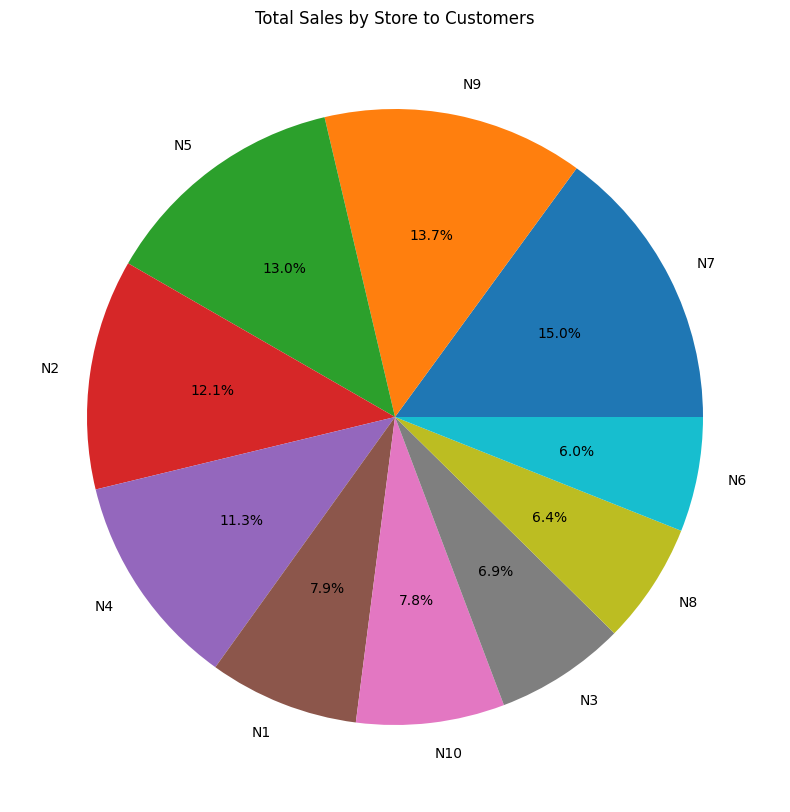

In [17]:
sales_by_store = unique_sales.groupby("STORE").sum(numeric_only=True).sort_values('BILL_AMT_y', ascending=False)
plt.figure(figsize=(10,10))
plt.pie(sales_by_store['BILL_AMT_y'], labels=sales_by_store.index, autopct='%1.1f%%')
plt.title("Total Sales by Store to Customers")
plt.show()

The above graph states that the stores 7, 9, 5, 2, and 4 are well above the rest in terms of total sales during the three month period to the customers.

# The variability and what are their daily sales each month in total and in average ?

Text(0, 0.5, 'Sales')

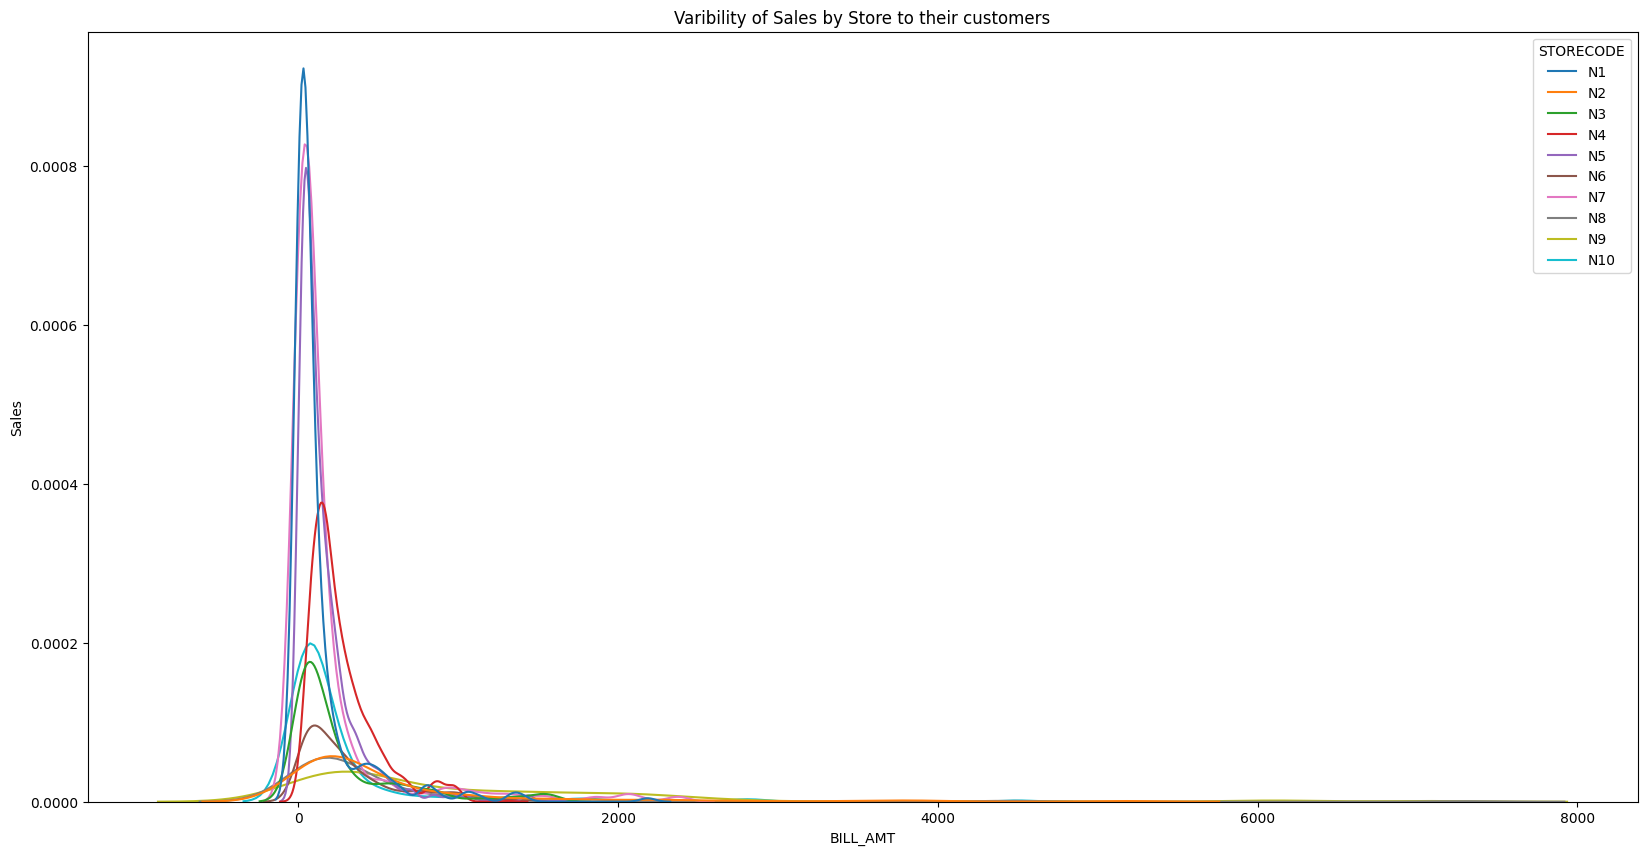

In [18]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df, x="BILL_AMT", hue="STORECODE")
plt.title("Varibility of Sales by Store to their customers")
plt.ylabel("Sales")


What are the daily sales by Store?

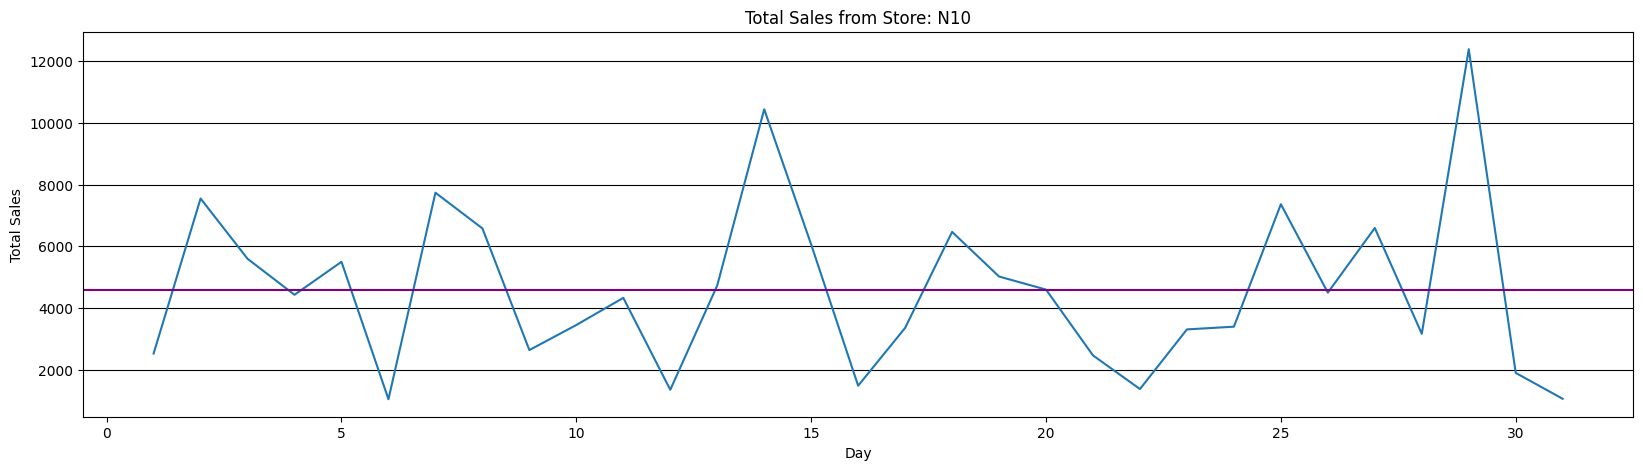

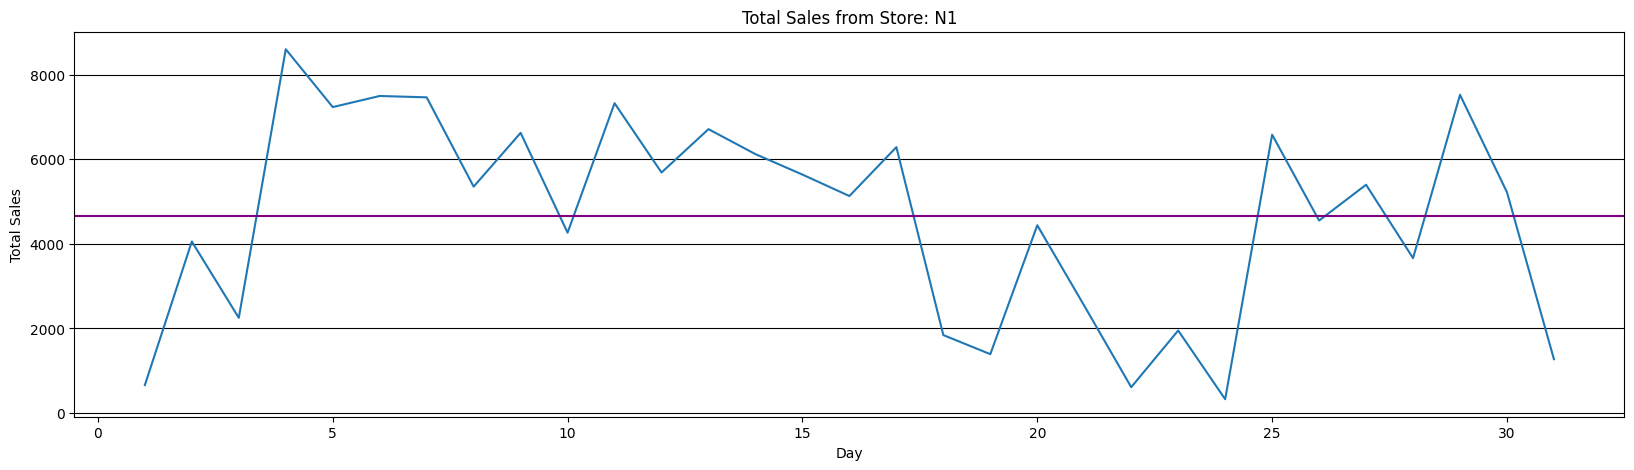

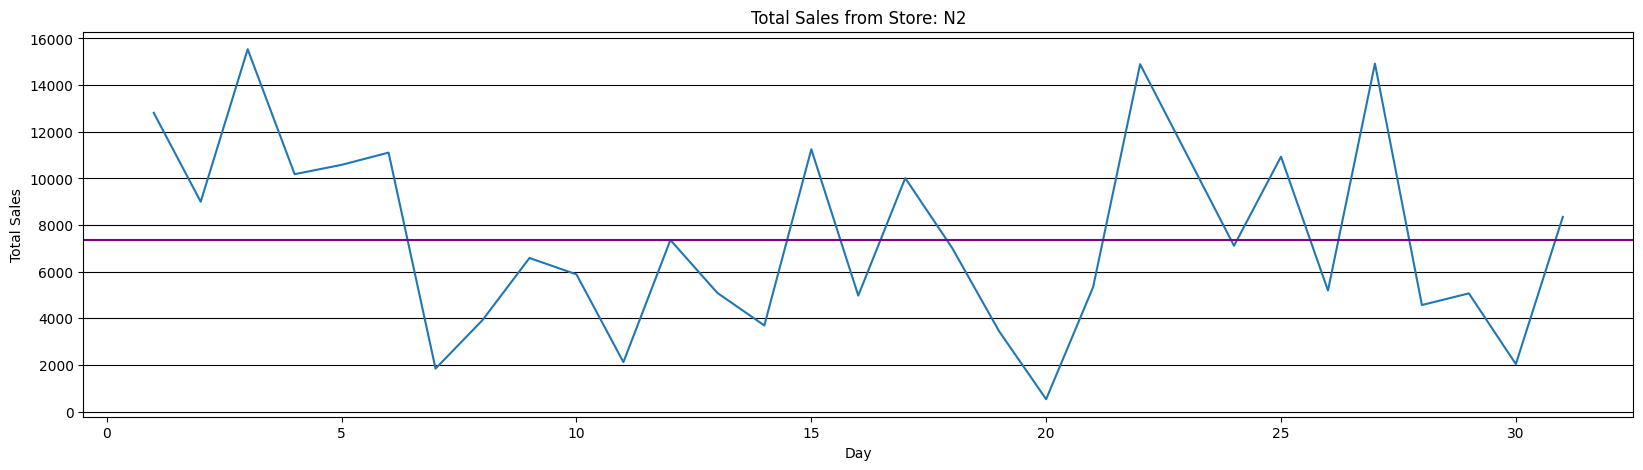

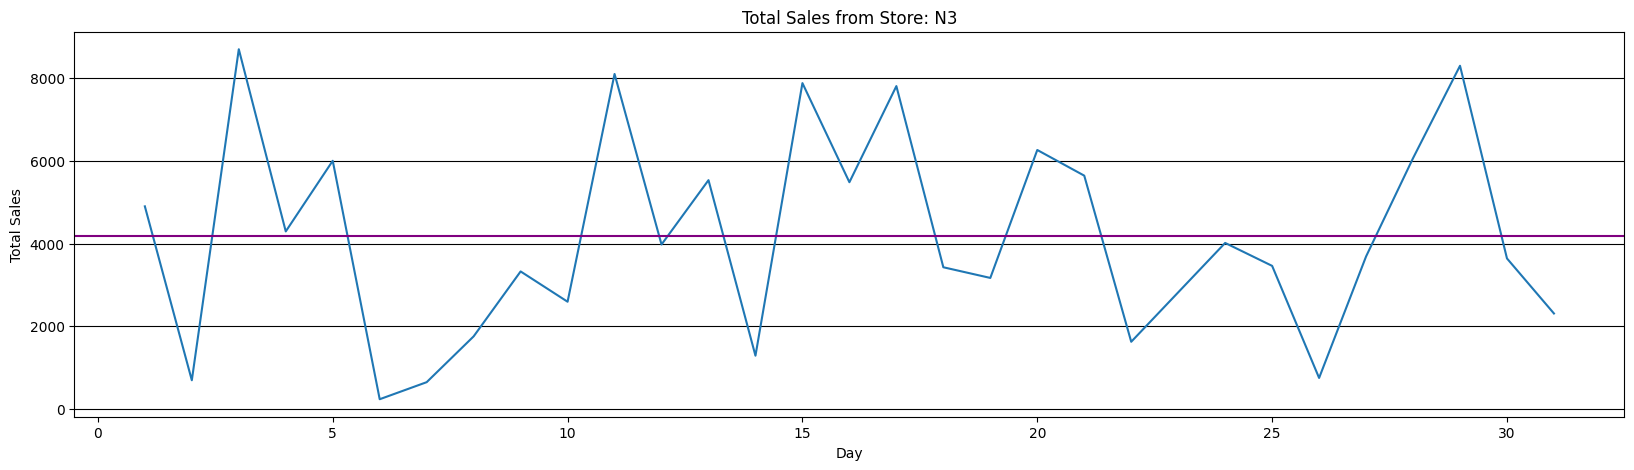

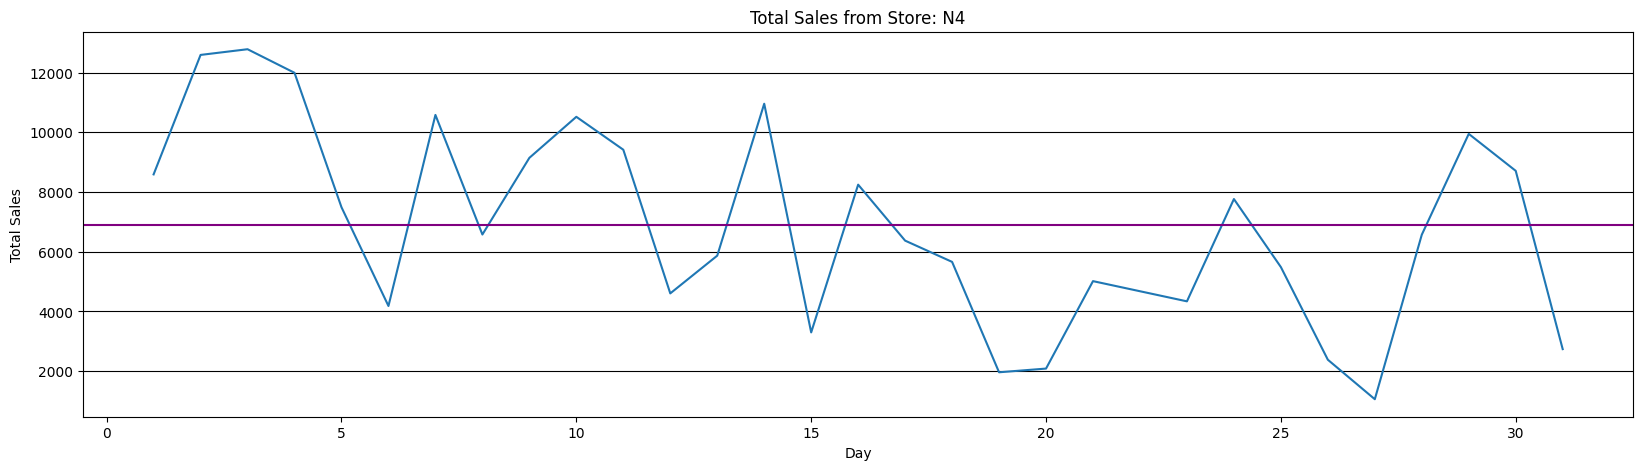

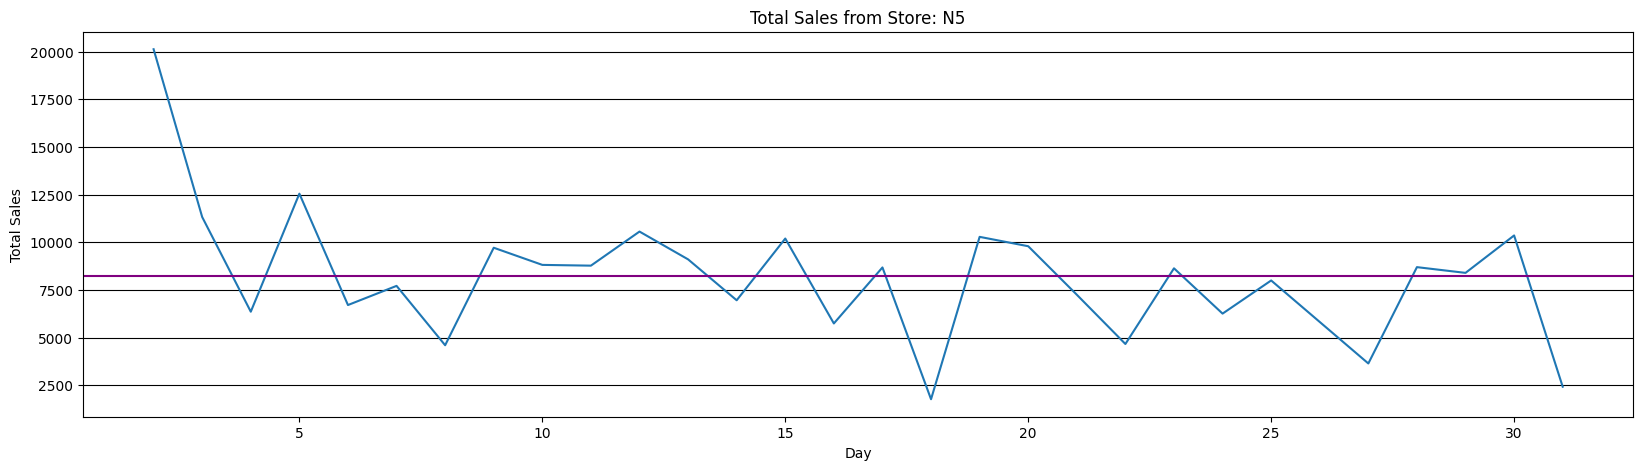

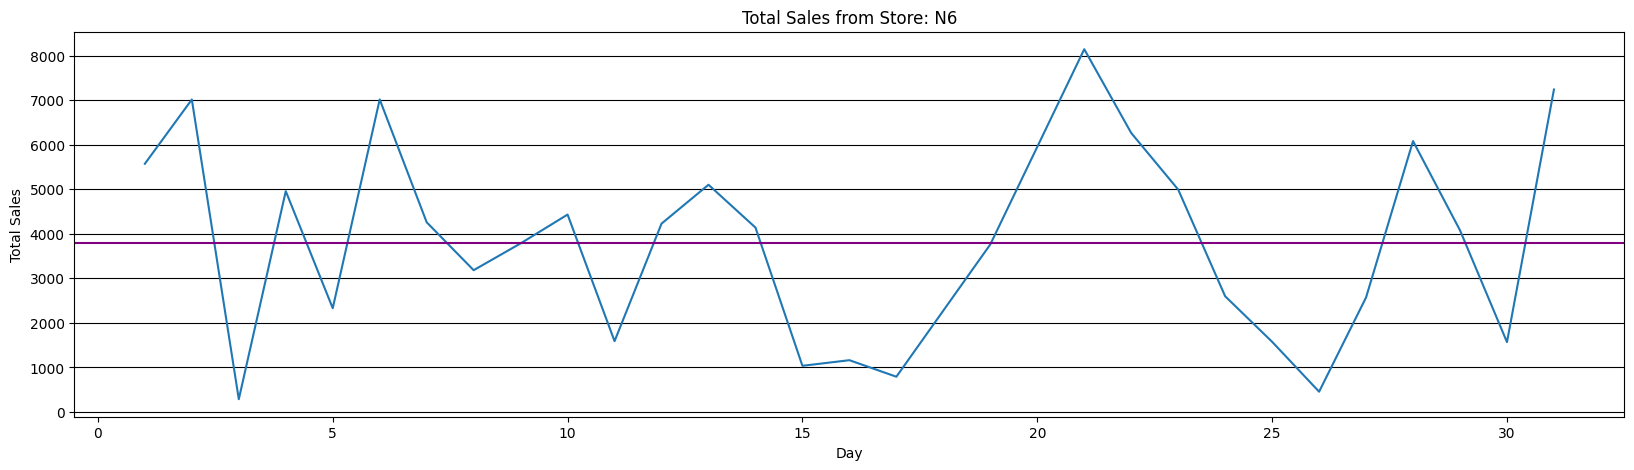

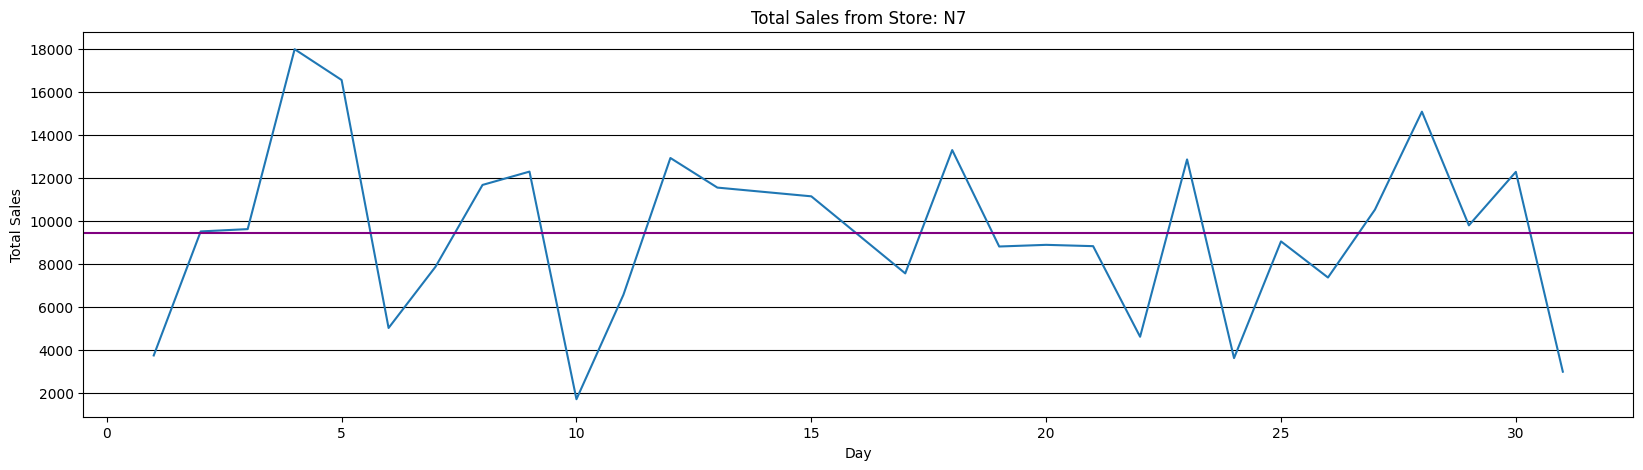

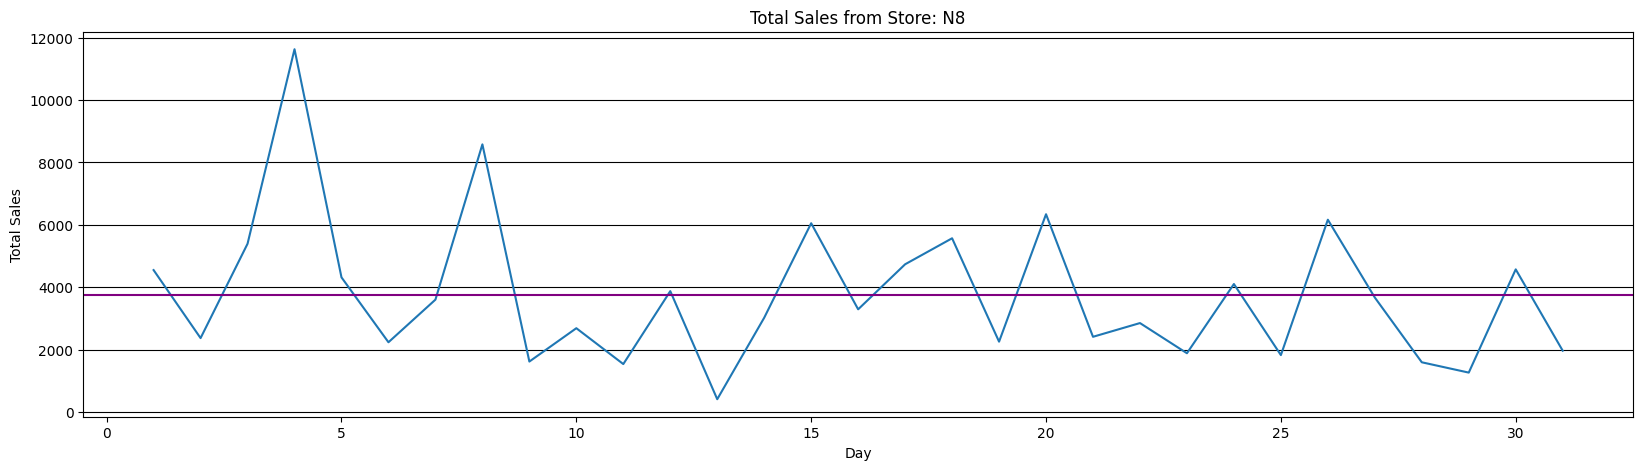

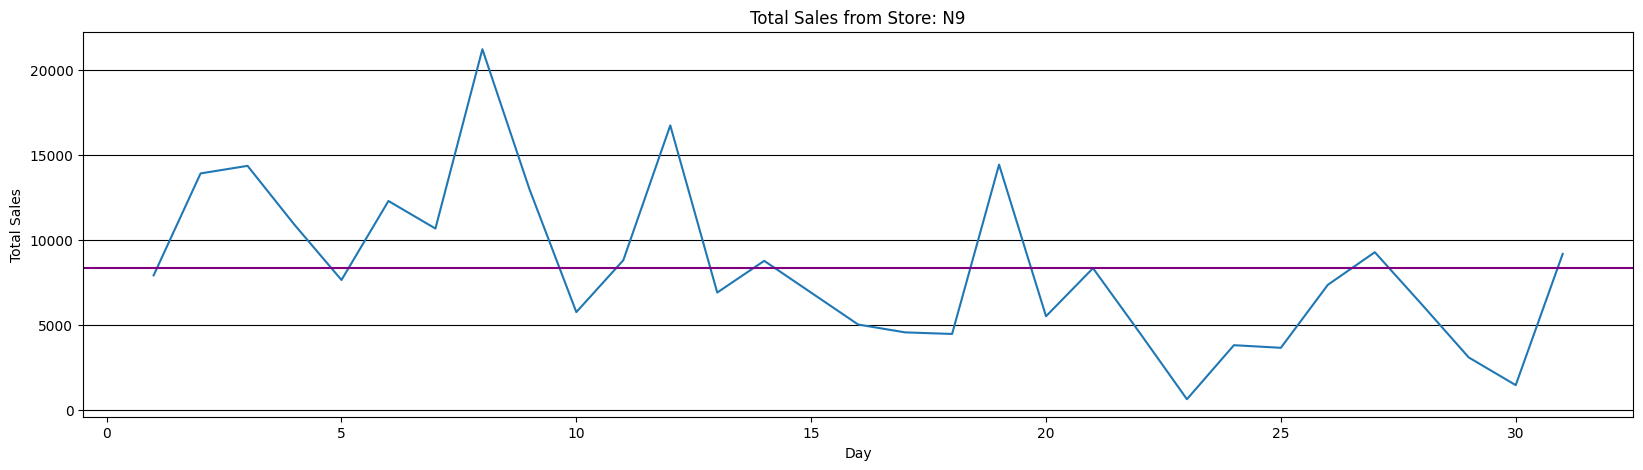

In [19]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").sum(numeric_only=True)
    plt.figure(figsize=(20,5))
    sns.lineplot(x=store.index,y=store["BILL_AMT_y"],data=store).axhline(store["BILL_AMT_y"].mean(),color='purple')
    plt.title("Total Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y',color='black')


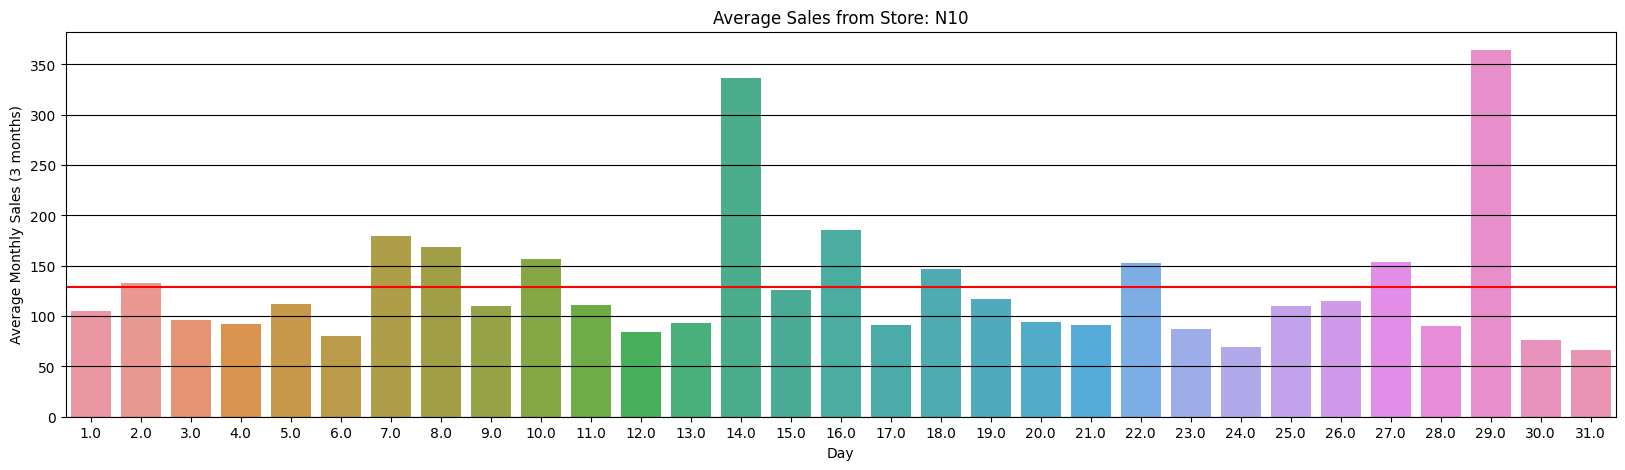

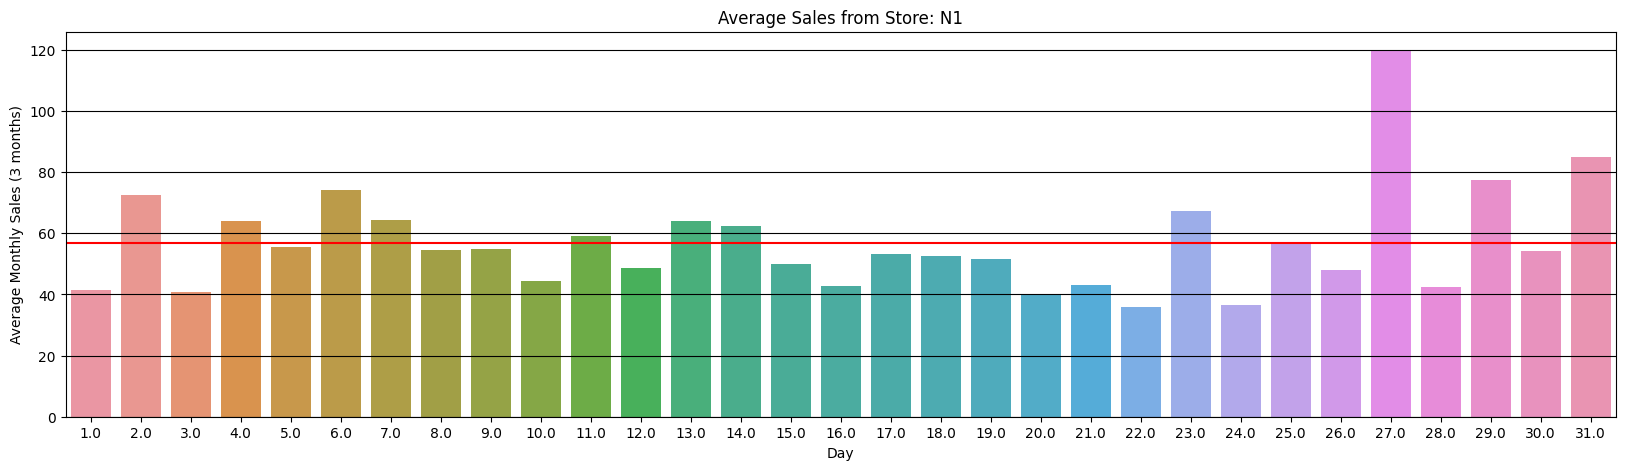

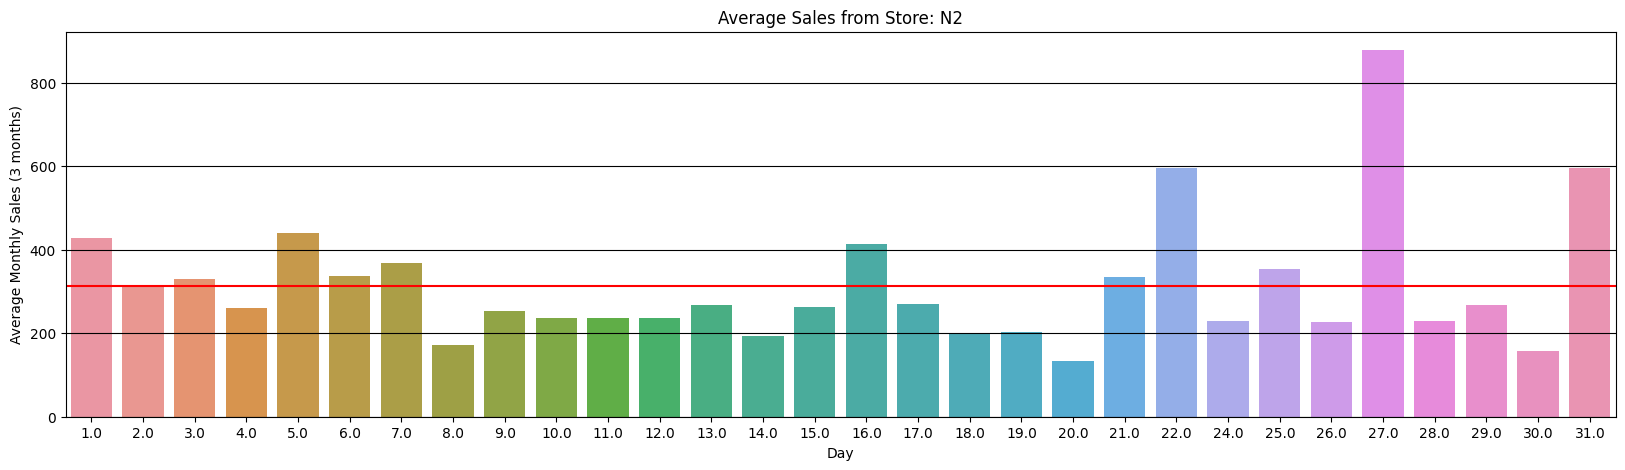

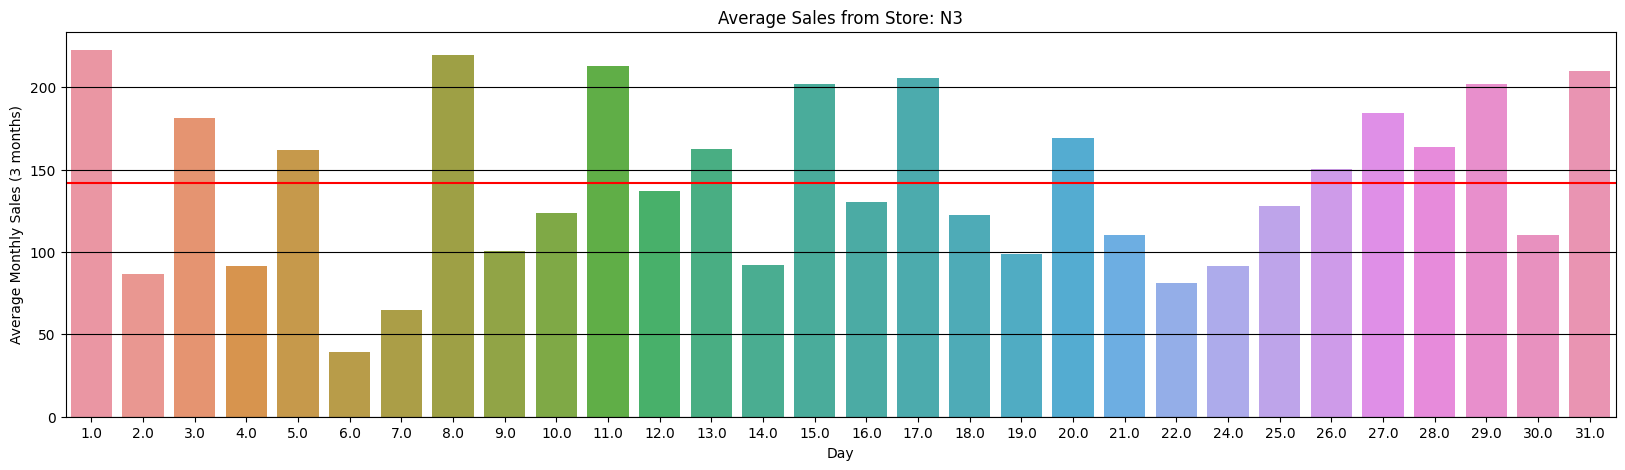

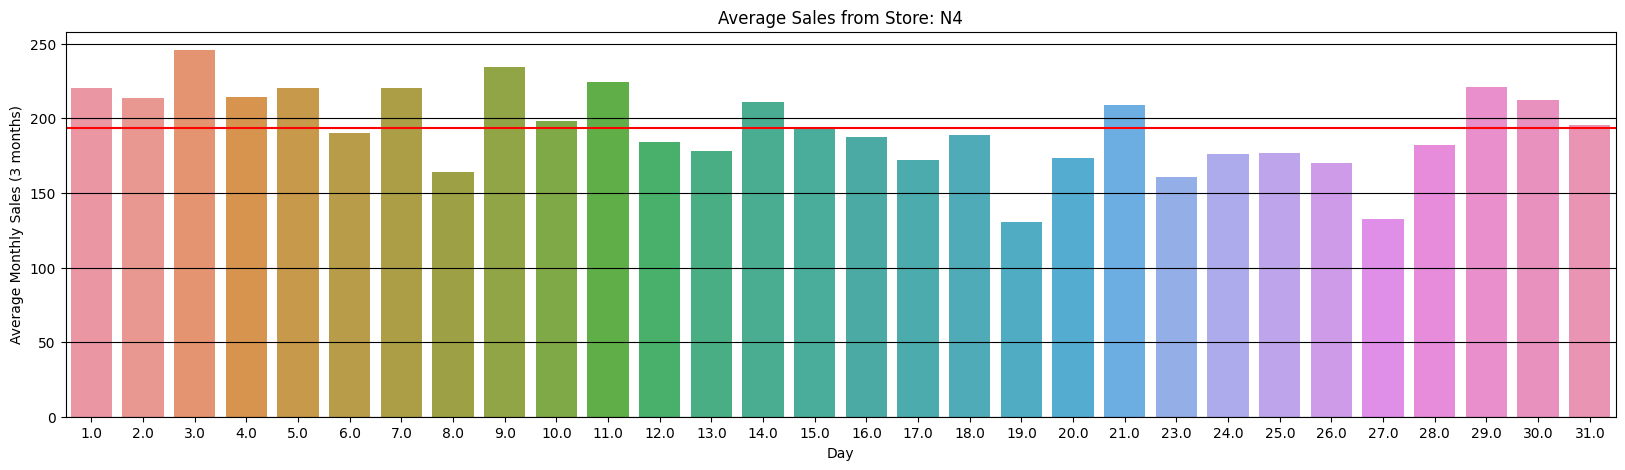

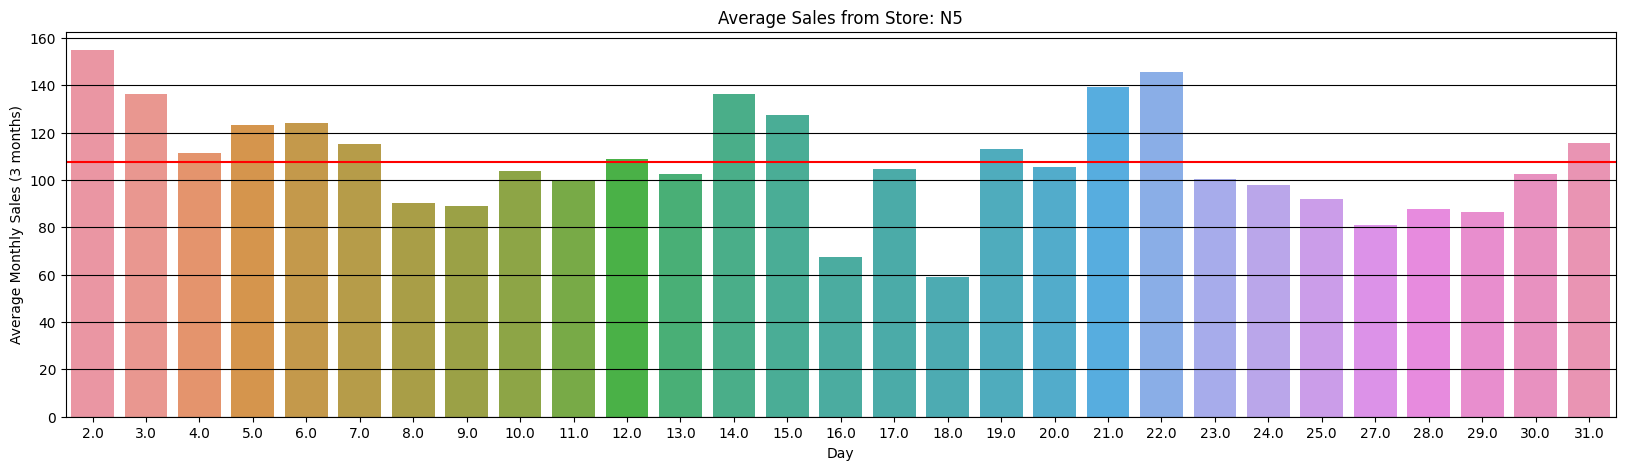

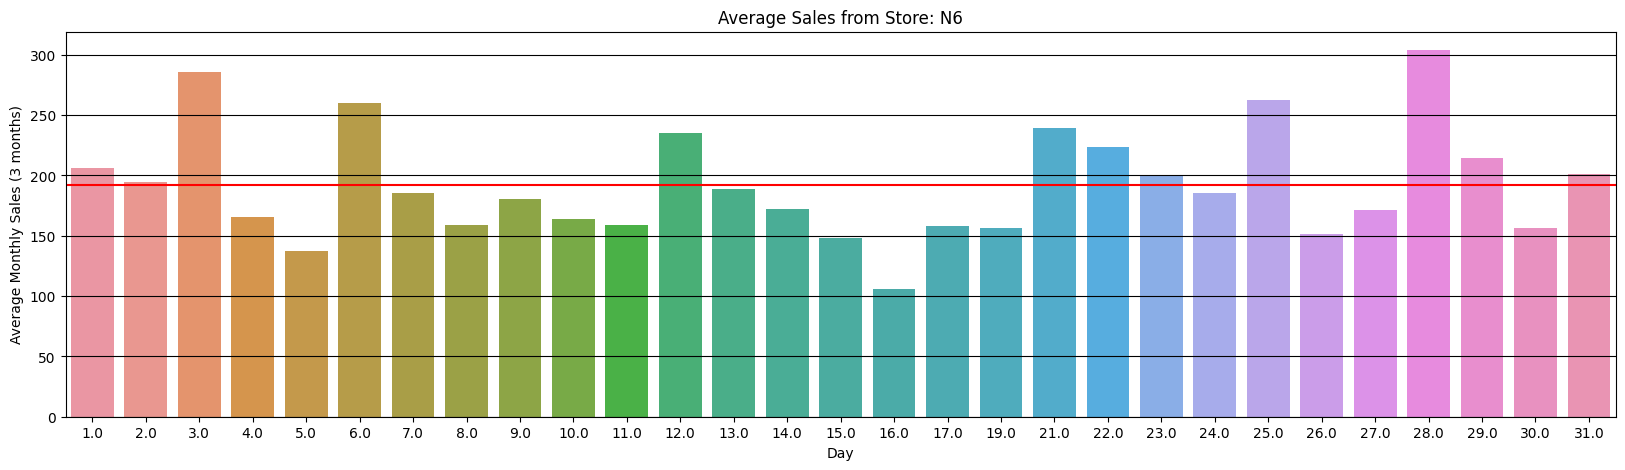

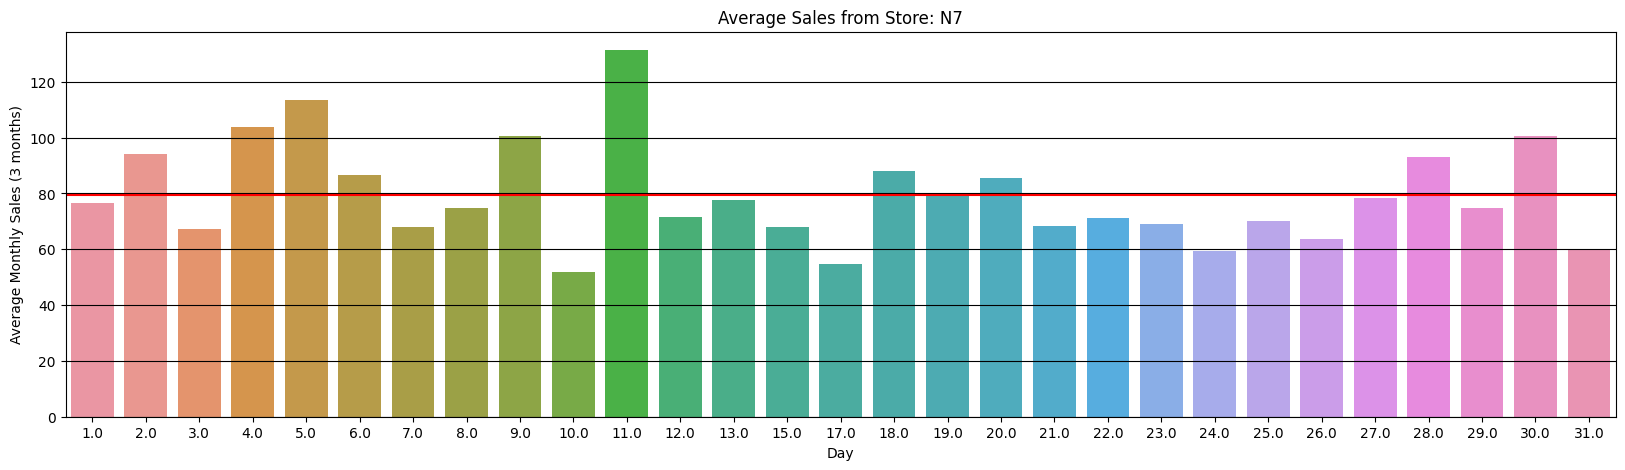

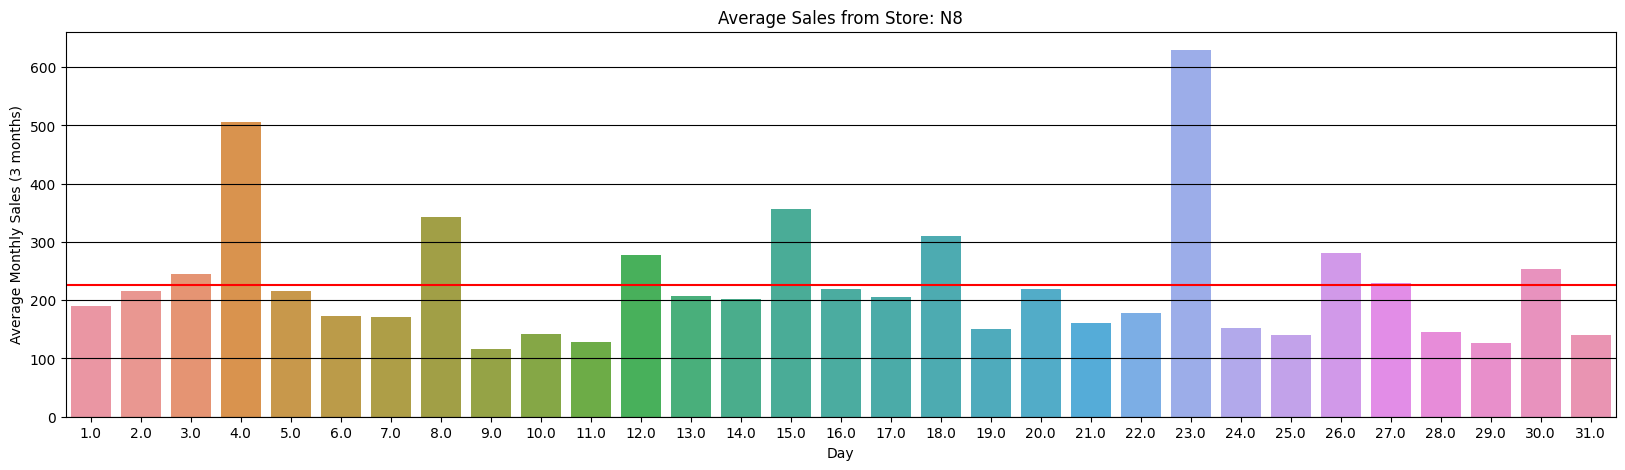

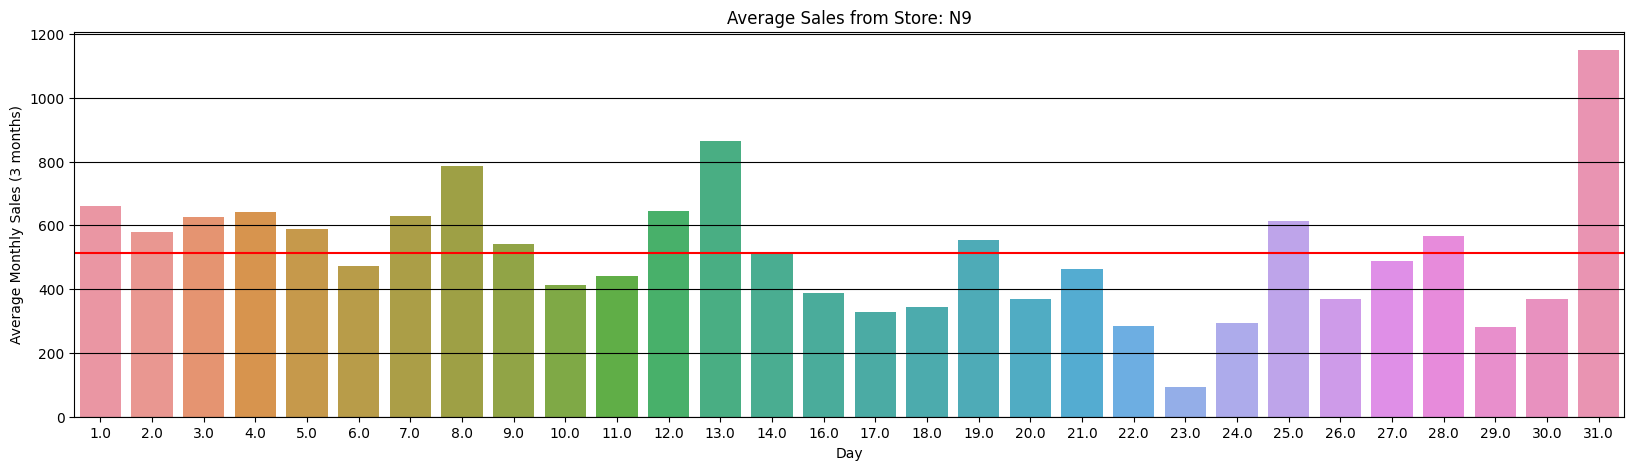

In [20]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").mean(numeric_only=True)
    plt.figure(figsize=(20,5))
    sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store).axhline(store["BILL_AMT_y"].mean(),color='red')
    plt.title("Average Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Average Monthly Sales (3 months)")
    plt.grid(axis='y',color='black')

The first graph aggregates the sales of the thirty days of the month (three month aggregate). The second one takes an average of the daily sales during the entire month for the three month period.

The first set confirms the fact that stores 7, 9, 5, 2, and 4 have the highest total sales. However, the second one contradicts the first one. Stores 9, 8, 4, 6, and 2 have the highest average daily sales. This explains us that the other stores possibly had a couple of days of good sales but had less consistency.

# Which category is liked by the Customers in general and by store?

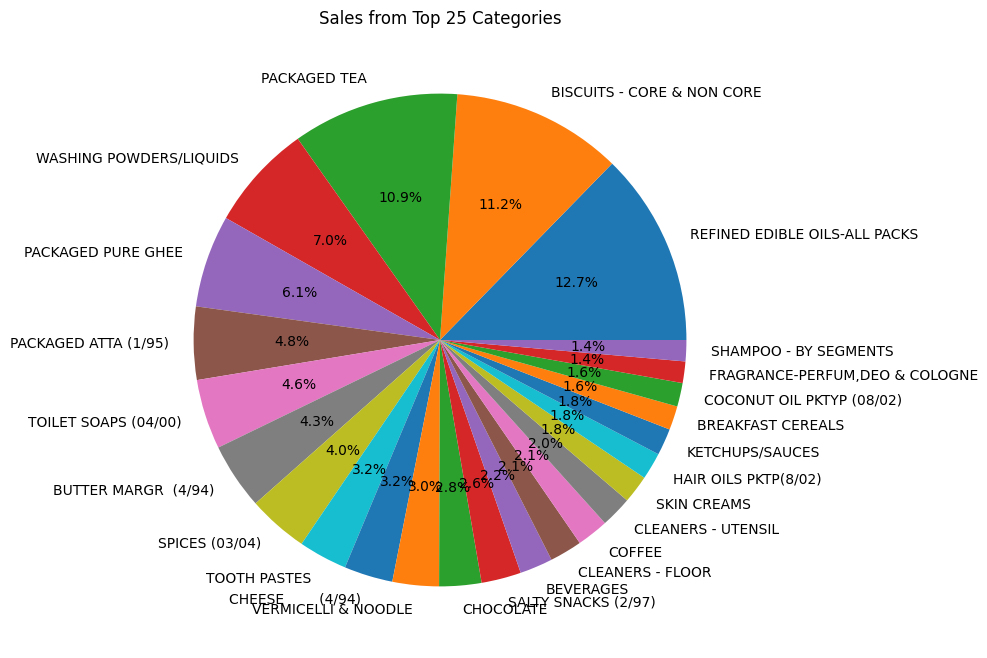

In [21]:
top_items_sales = merged_df.groupby('GRP').sum(numeric_only=True).sort_values("VALUE",ascending=False)[['QTY_x','PRICE','VALUE']][0:25]
plt.figure(figsize=(12,8))
plt.pie(top_items_sales['VALUE'], labels=top_items_sales.index, autopct='%1.1f%%')
plt.title("Sales from Top 25 Categories")
plt.show()


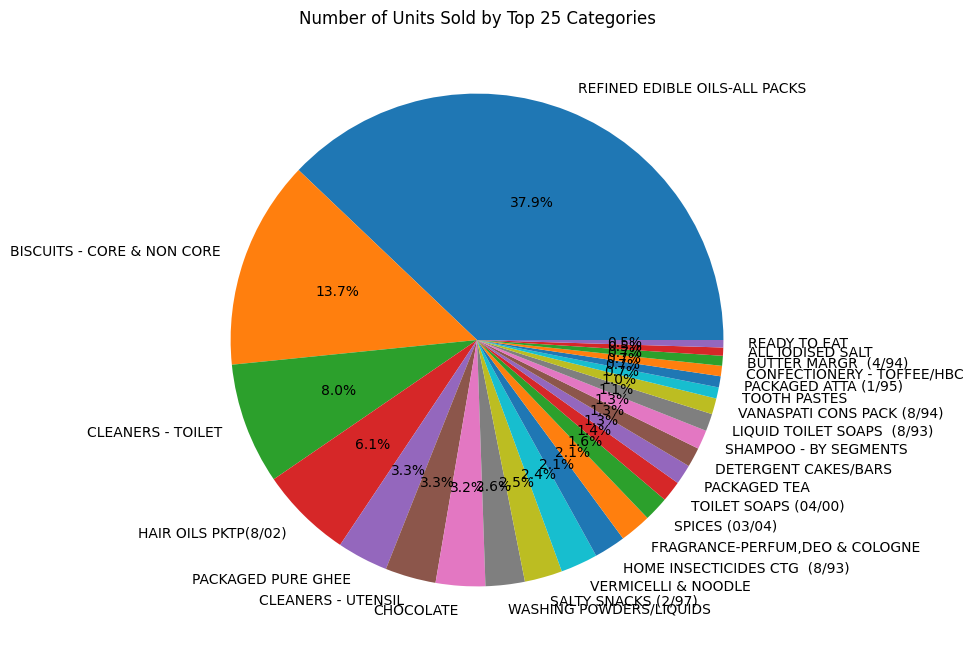

In [22]:
top_items = merged_df.groupby('GRP').sum(numeric_only=True).sort_values("QTY_x",ascending=False)[['QTY_x','PRICE']][0:25]
plt.figure(figsize=(12,8))
plt.pie(top_items['QTY_x'], labels=top_items.index, autopct='%1.1f%%')
plt.title("Number of Units Sold by Top 25 Categories")
plt.show()


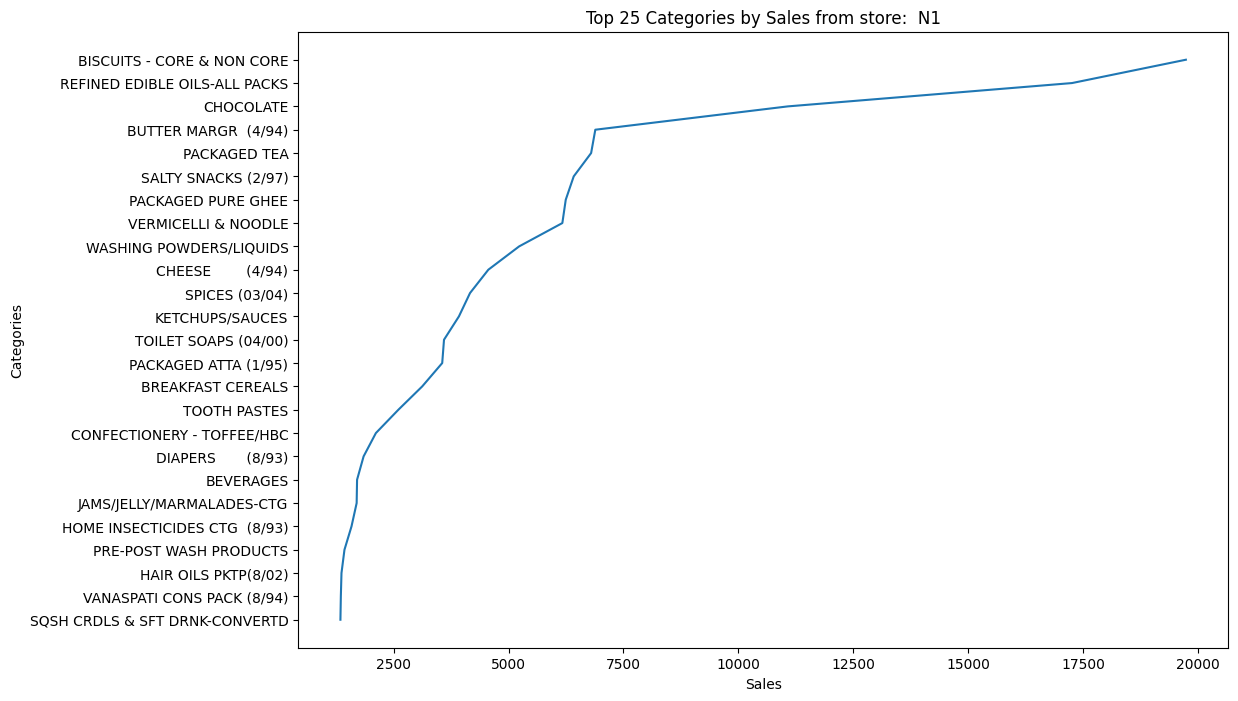

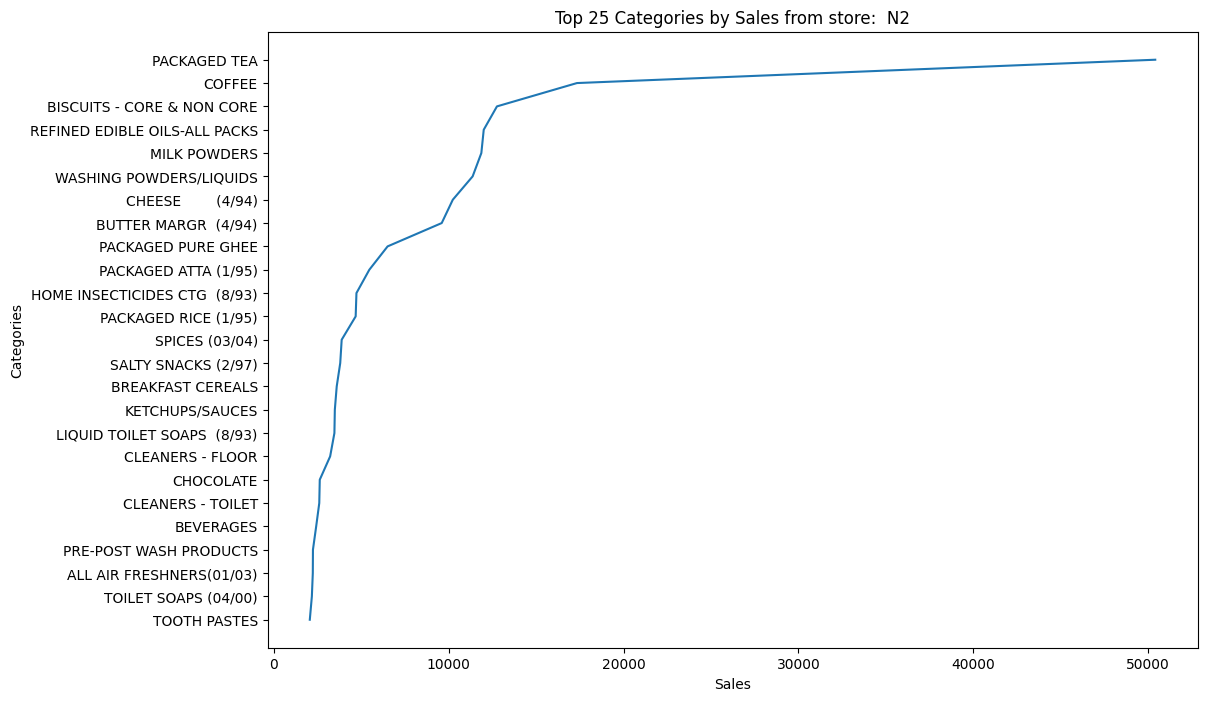

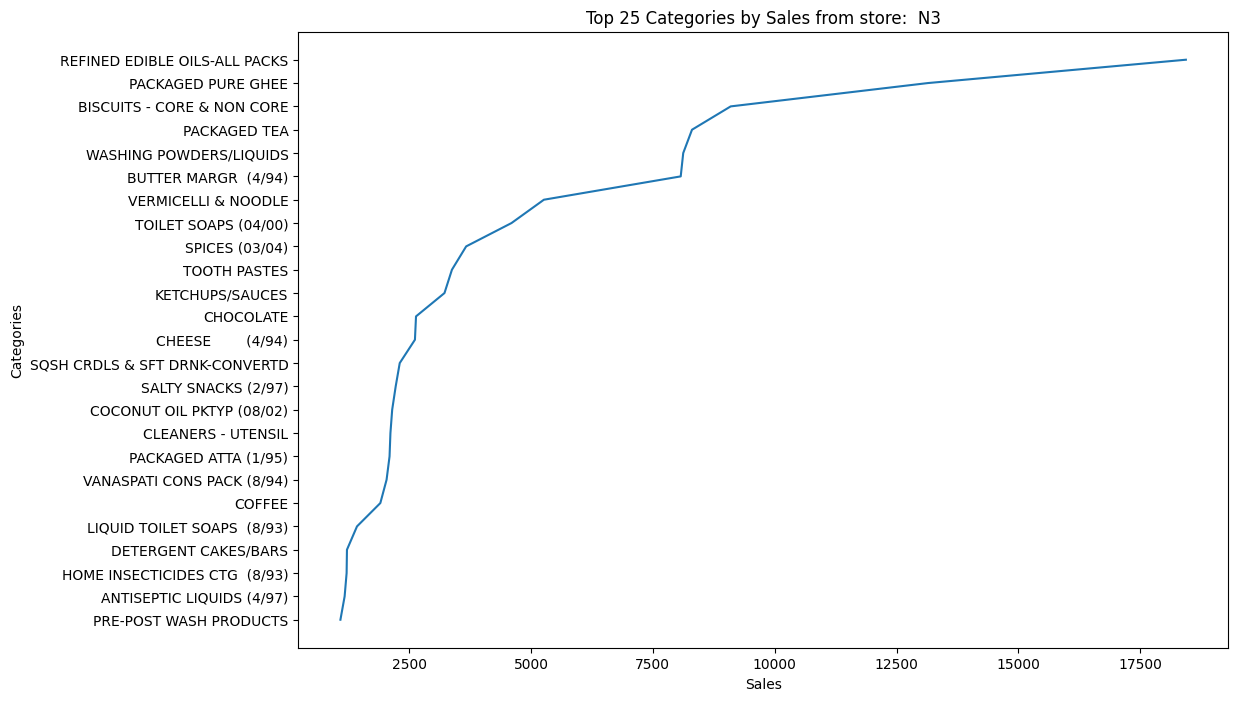

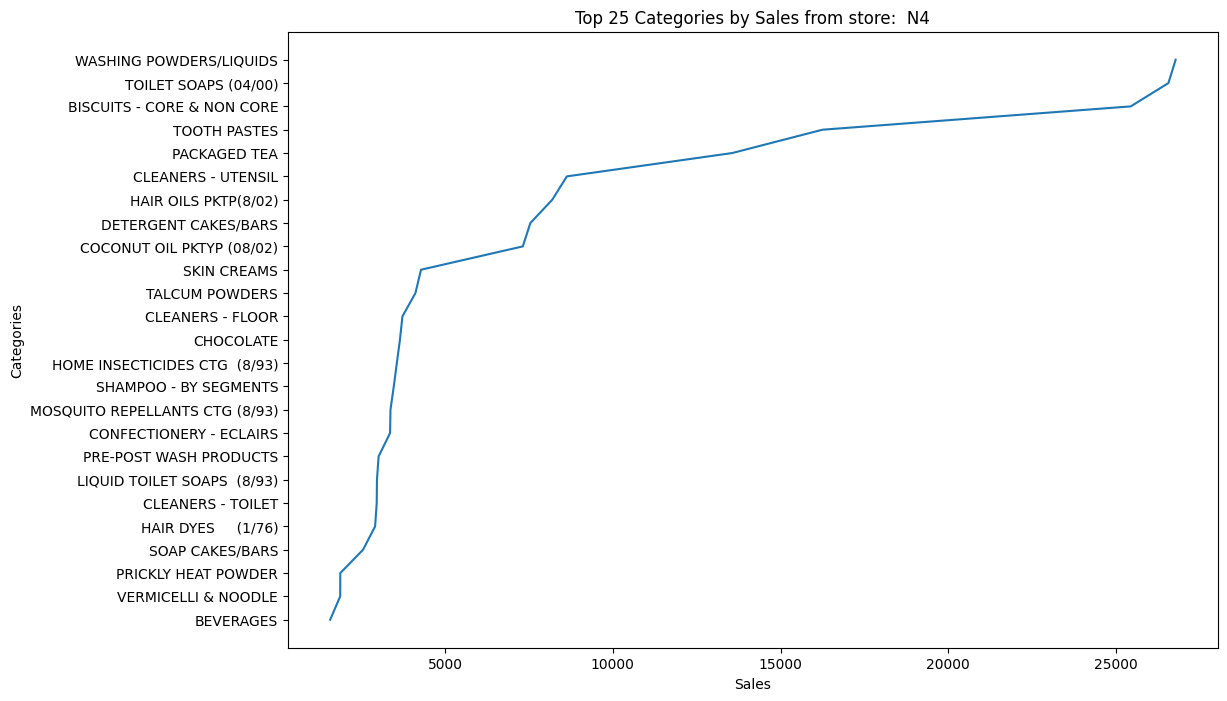

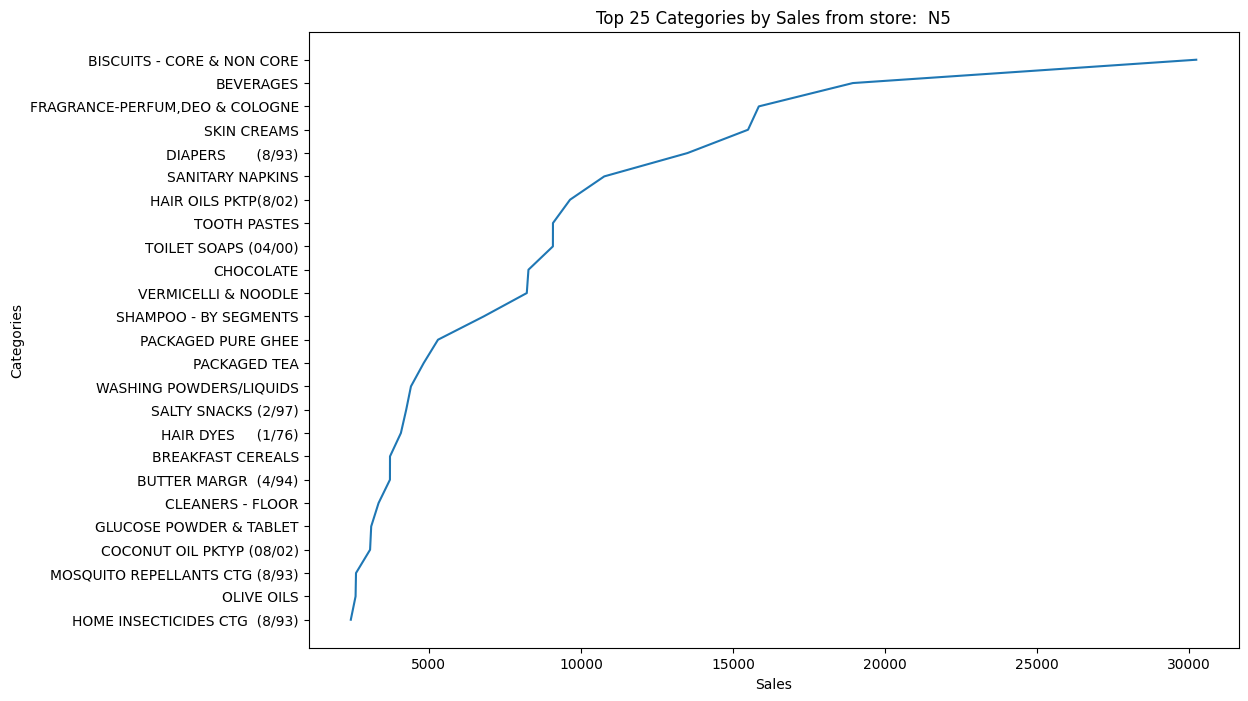

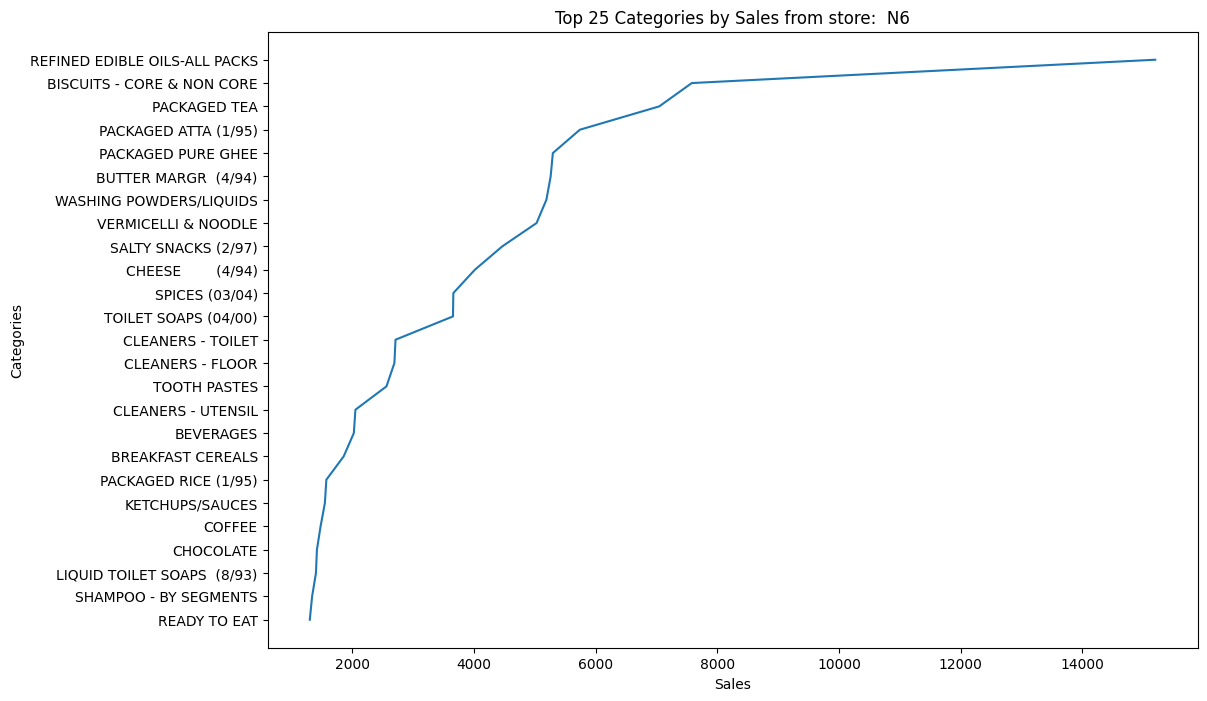

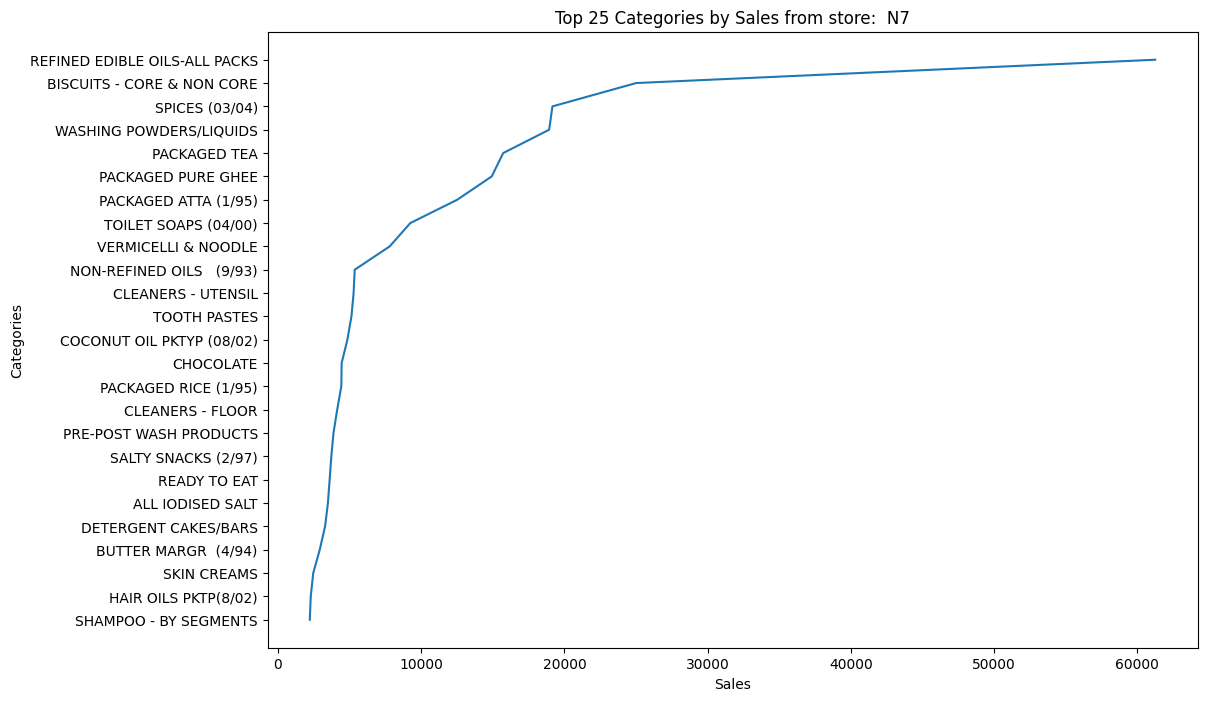

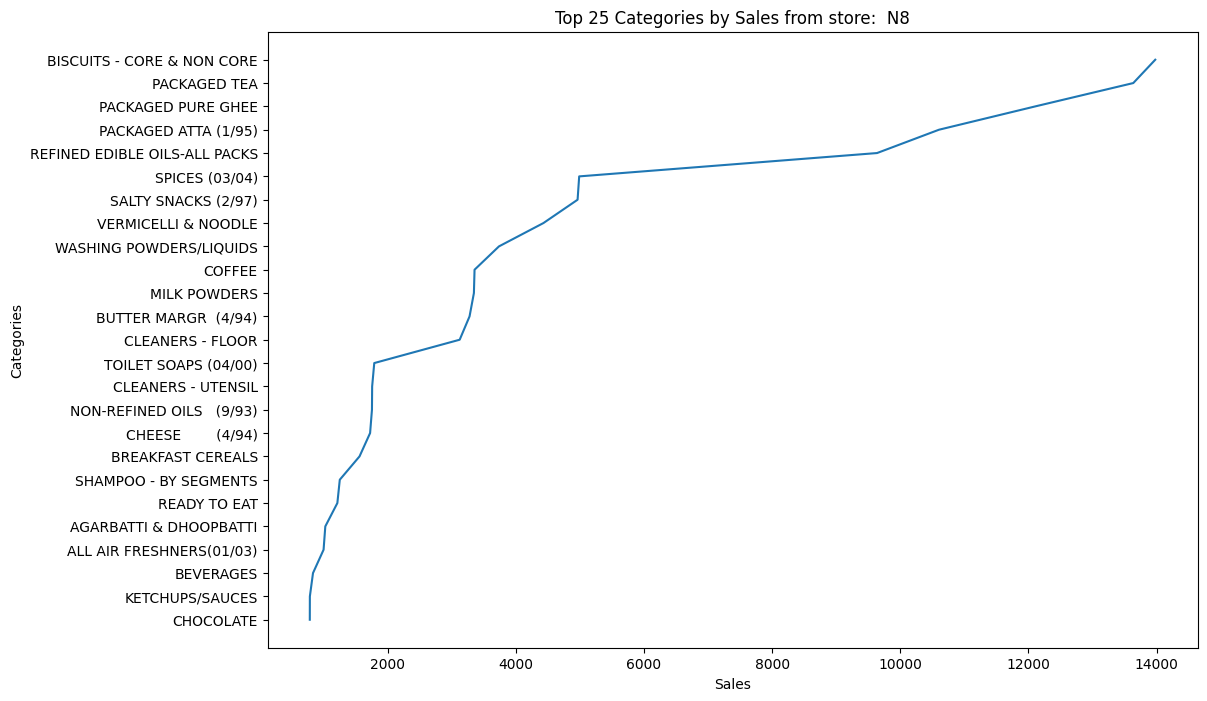

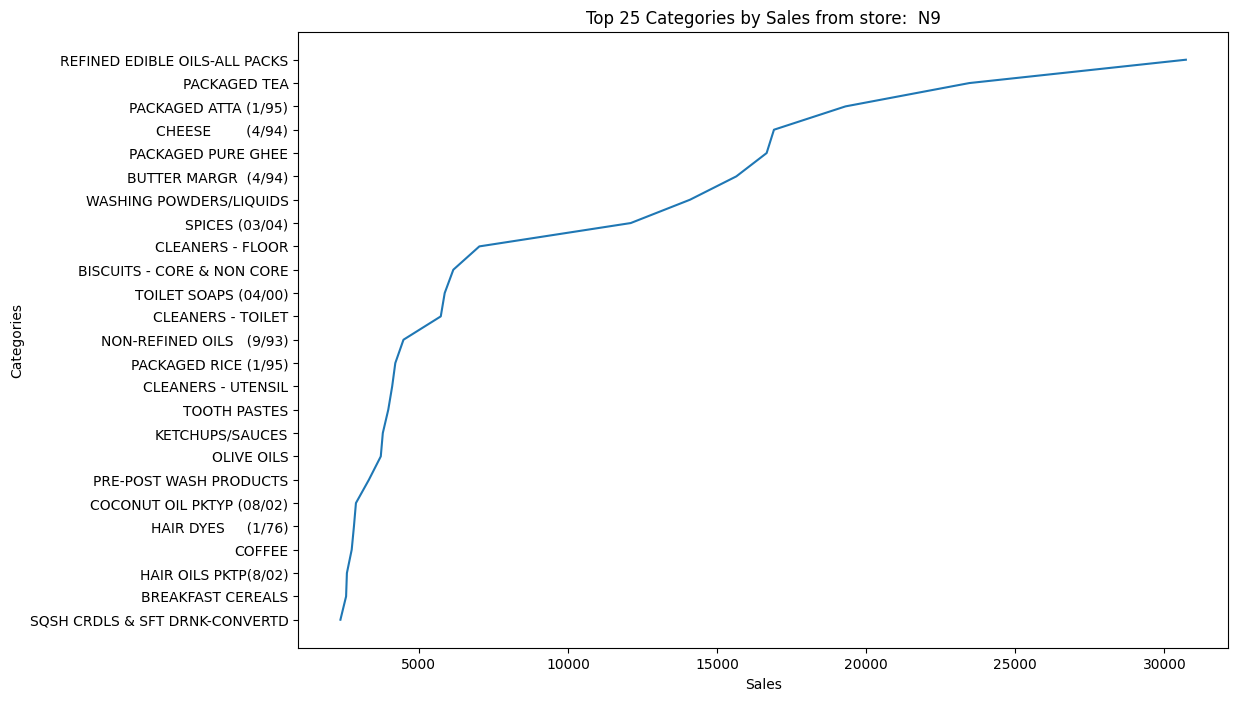

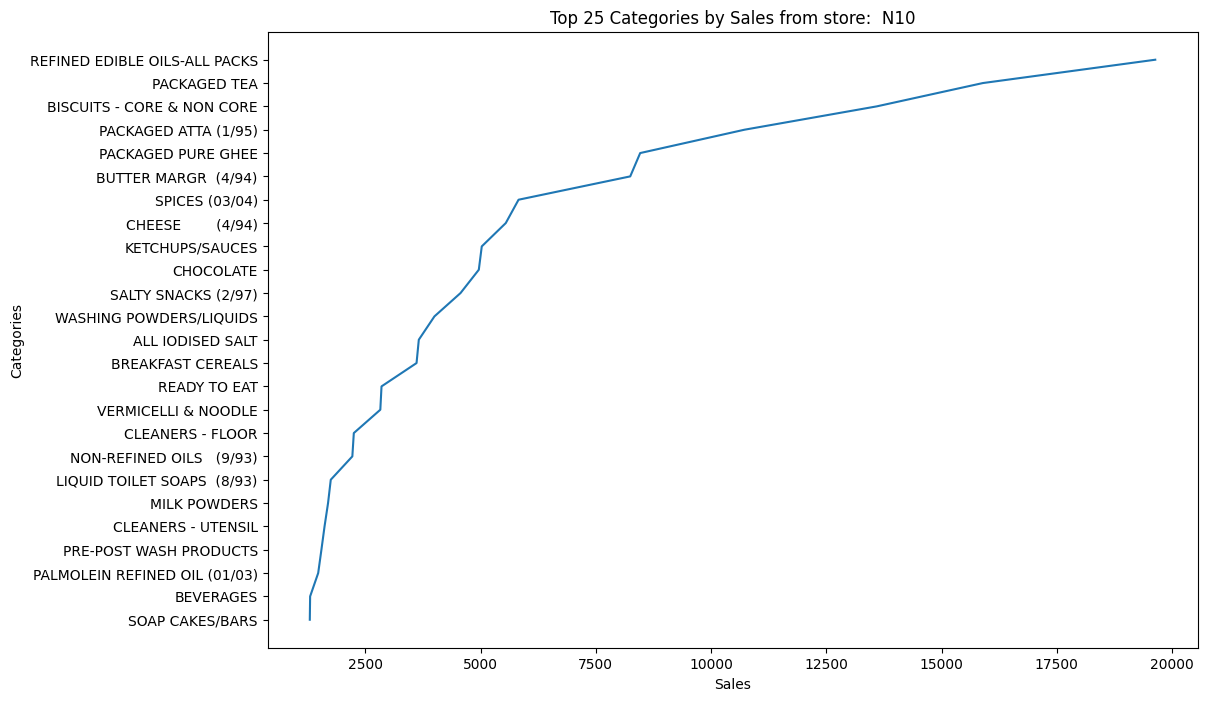

In [23]:
for i in merged_df.STORECODE.unique():
    x = merged_df.loc[df.STORECODE == i].groupby("GRP").sum(numeric_only=True).sort_values("VALUE",ascending=False)[["VALUE","QTY_x"]][0:25]
    plt.figure(figsize=(12,8))
    sns.lineplot(x='VALUE',y=x.index,data=x)
    plt.title("Top 25 Categories by Sales from store:  " + i)
    plt.ylabel("Categories")
    plt.xlabel("Sales")


By looking into the different product categories, we can see that each store caters to a different customers. This may be as a result of location or business strategy. The customer preferences in some of the stores are dominated by cleaning products, others by pantry products, and some by snacks or a an even combination of all of them.

Similarly, we will analyze the number of units the customers bought by category at each store and determine if they are congruent with sales.

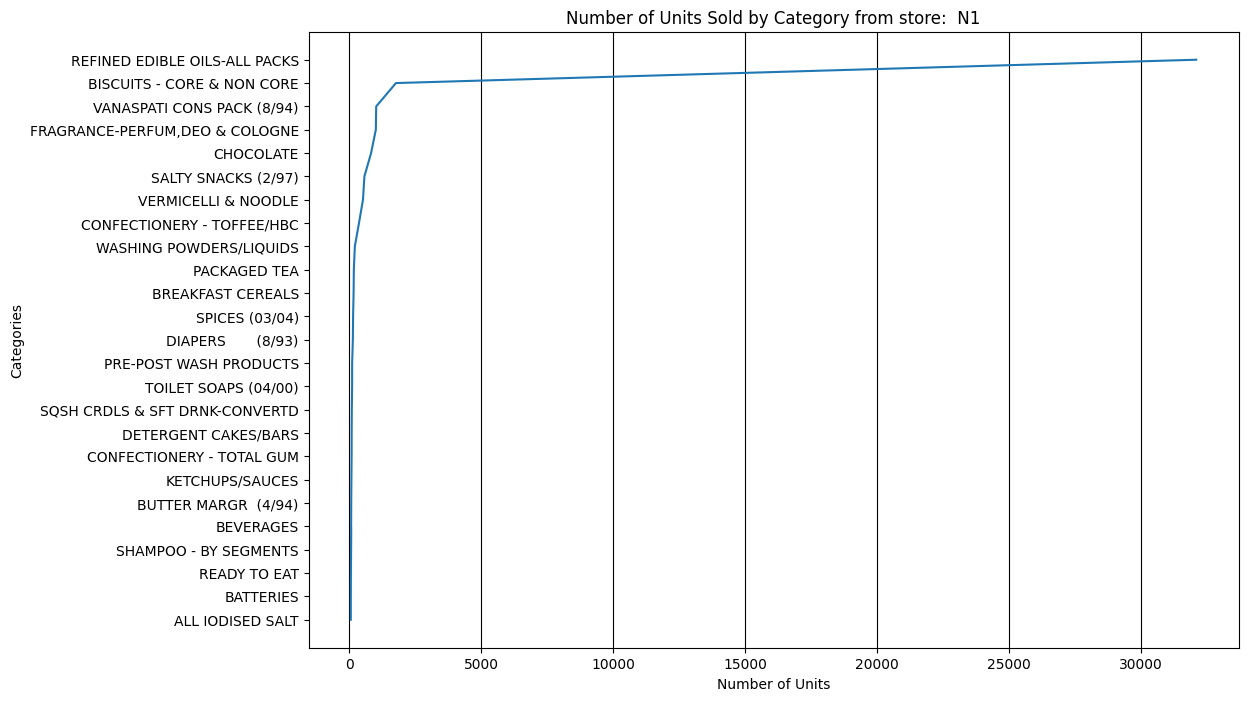

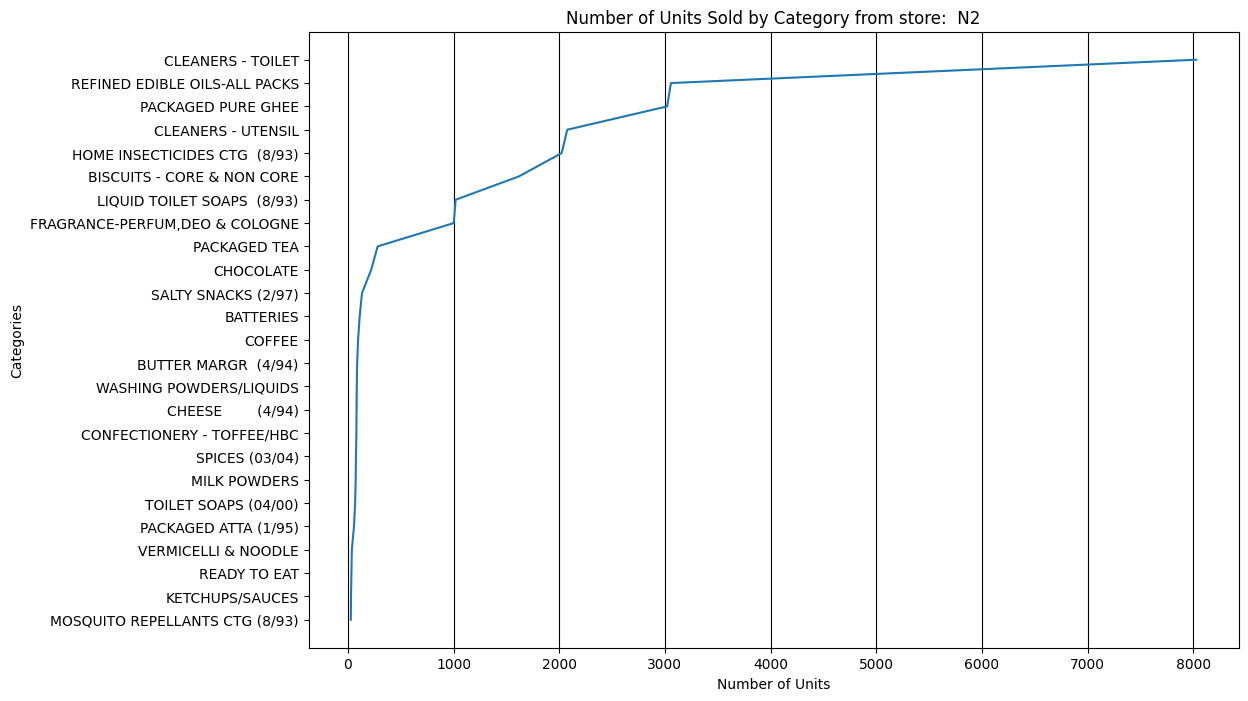

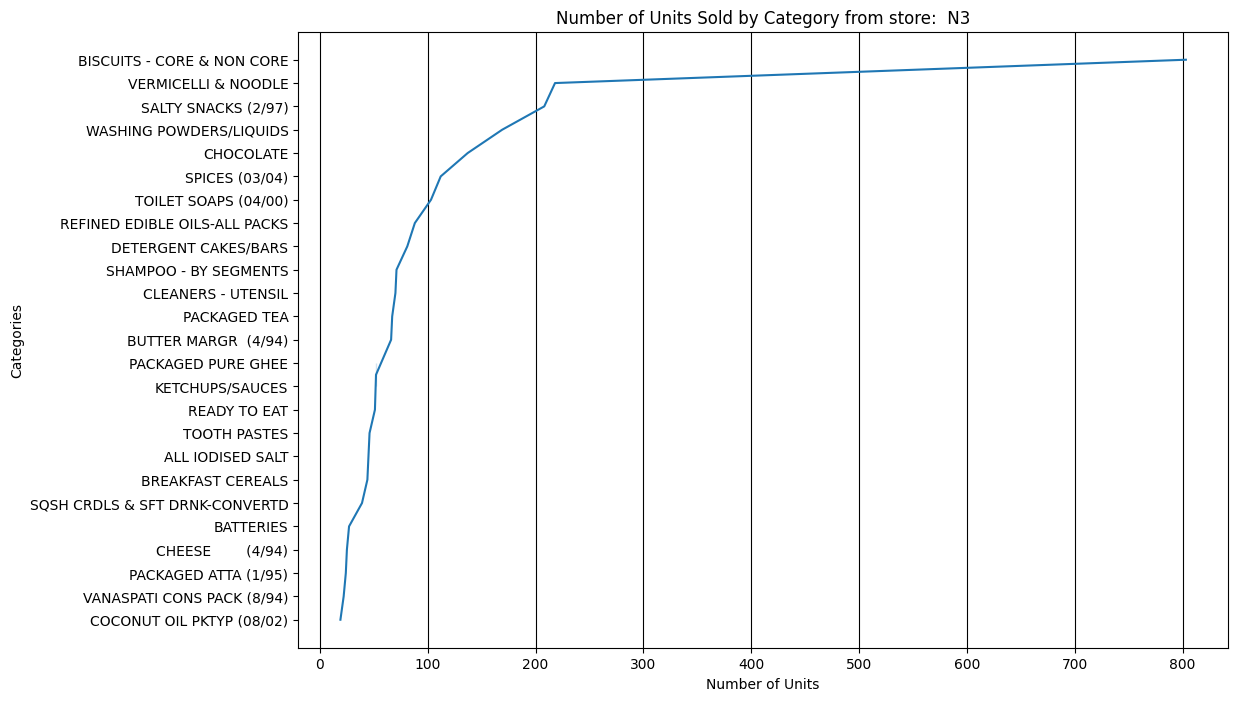

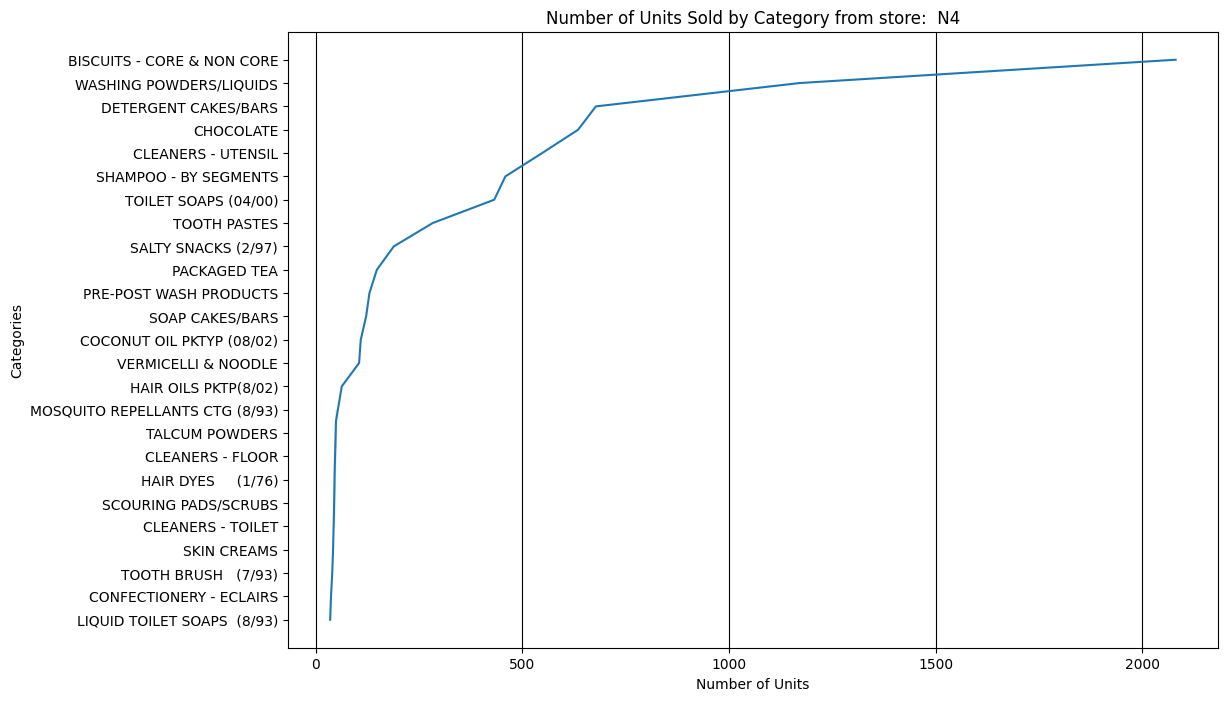

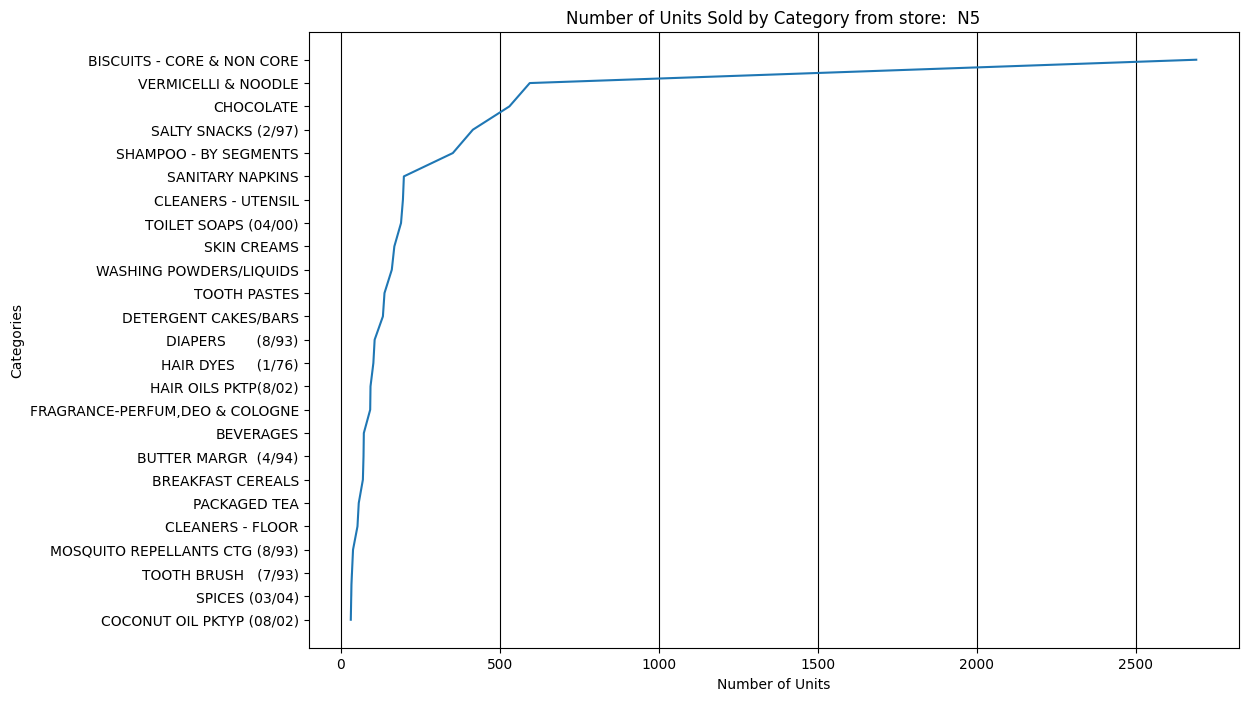

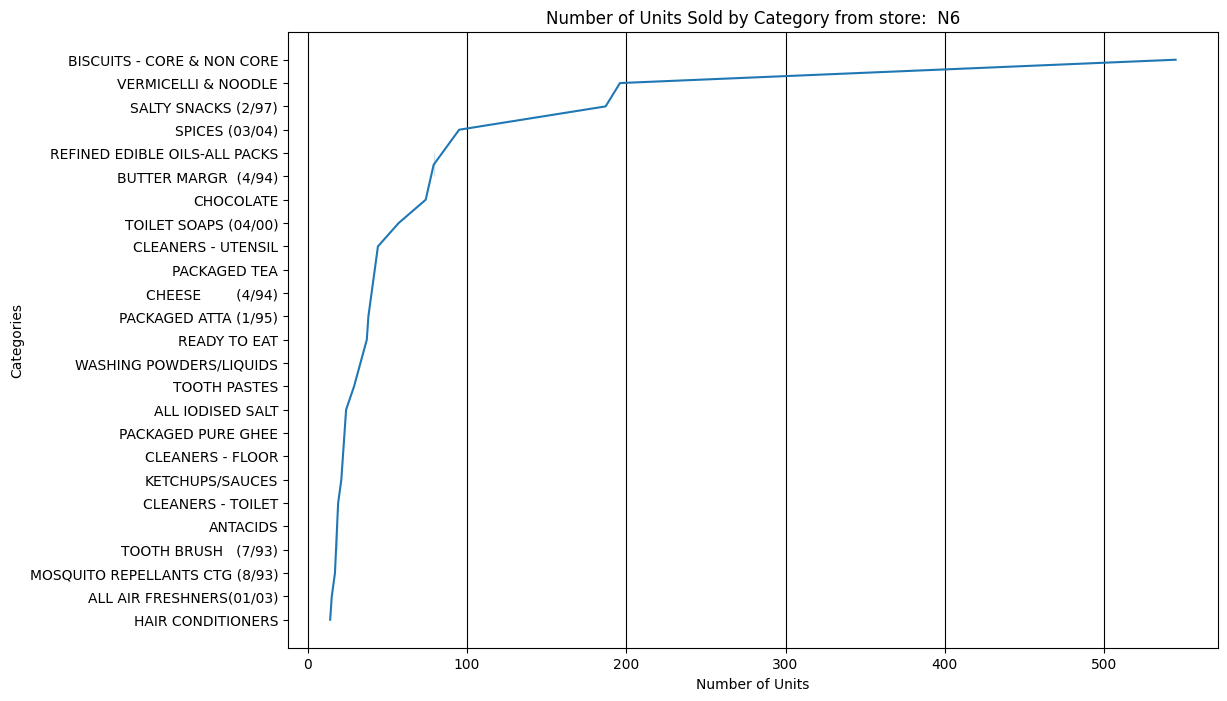

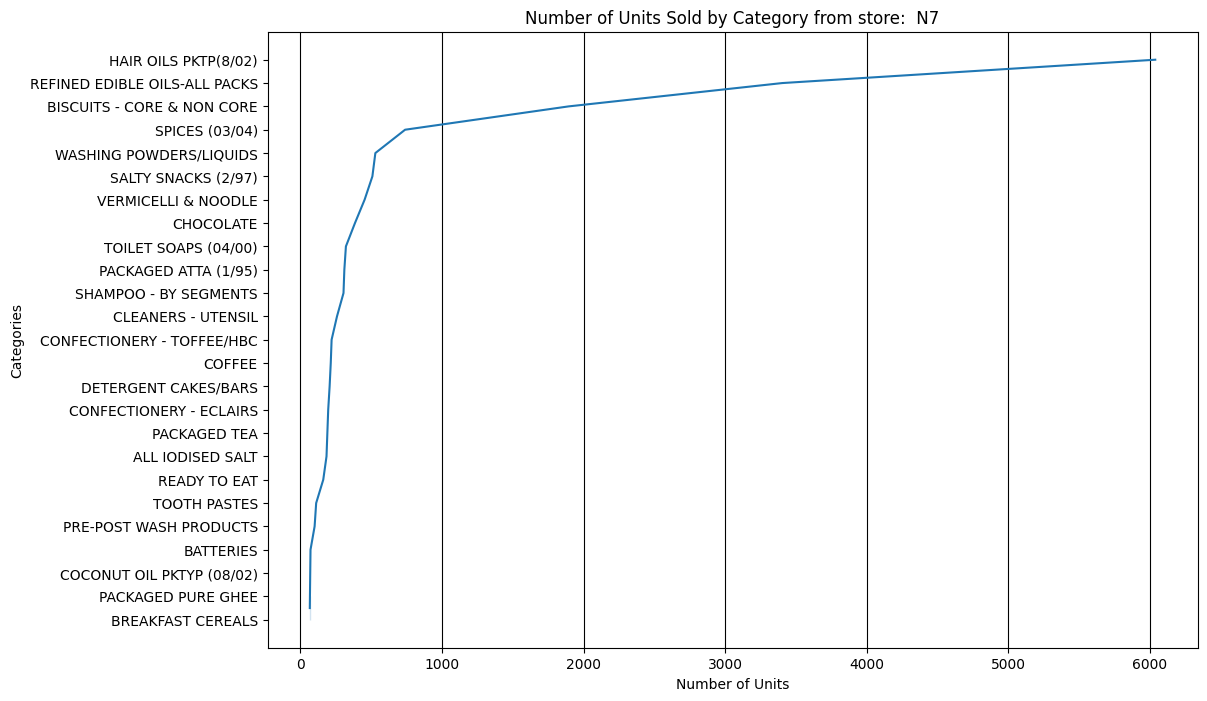

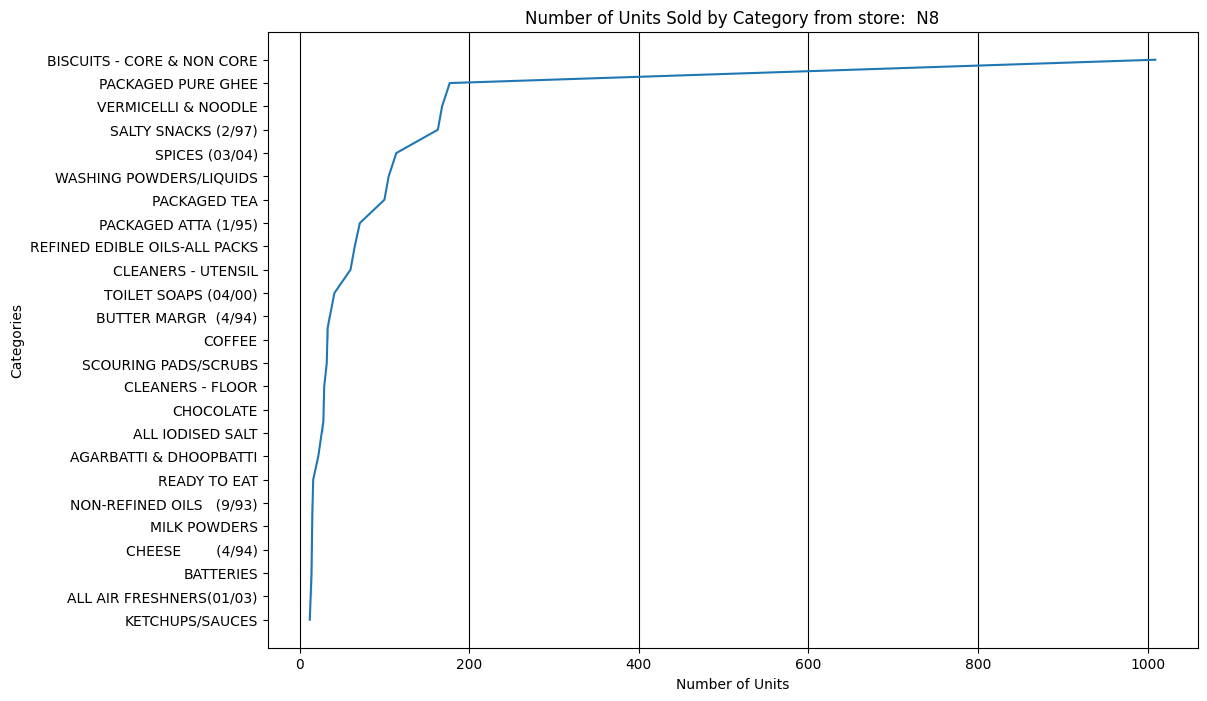

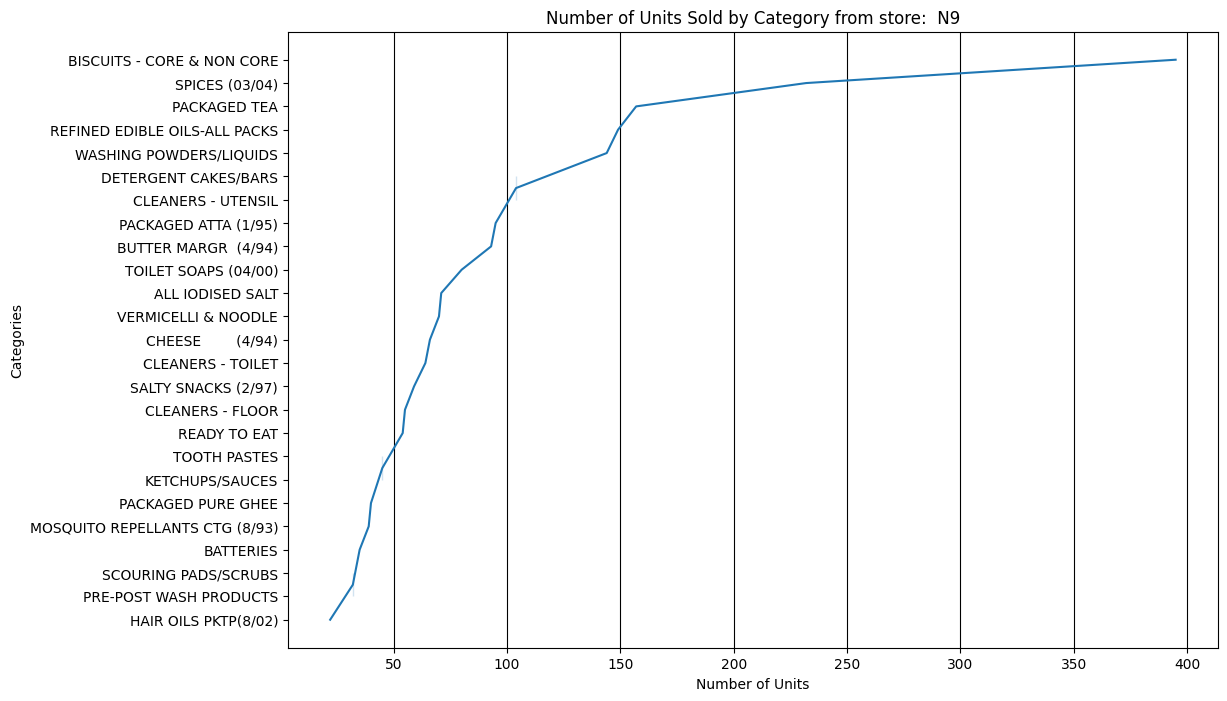

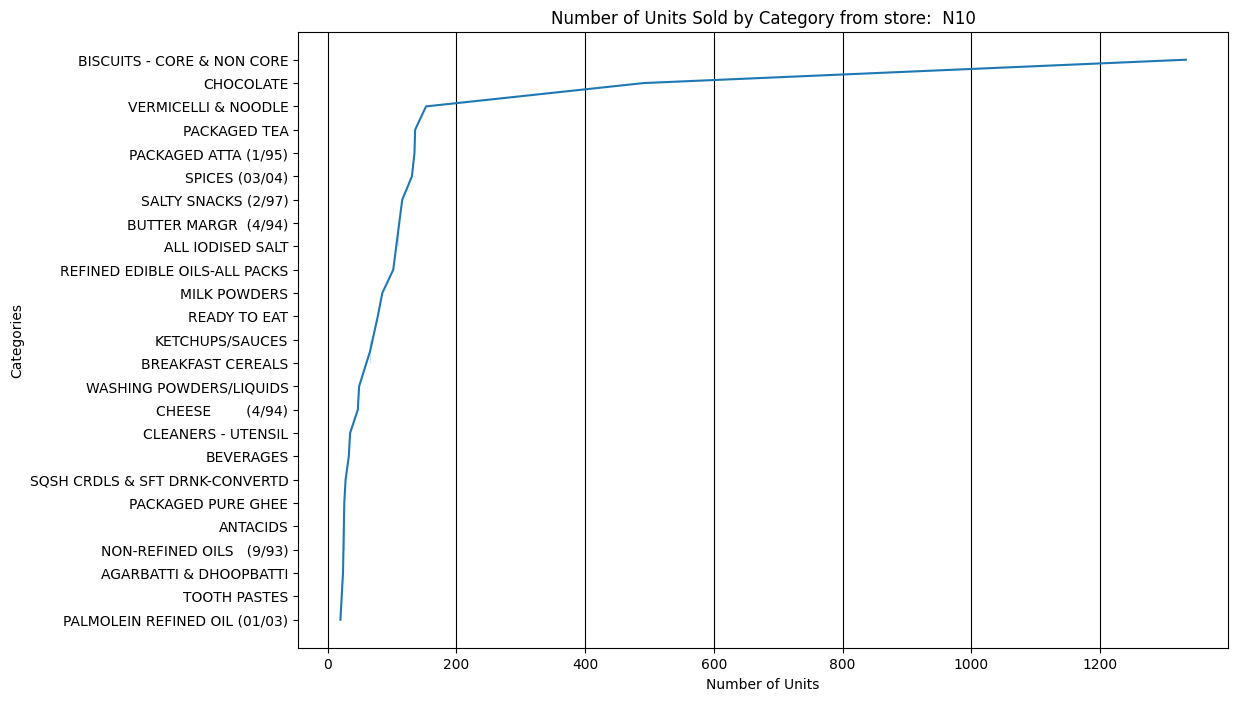

In [24]:
for i in merged_df.STORECODE.unique():
    x = merged_df.loc[df.STORECODE == i].groupby("GRP").sum(numeric_only=True).sort_values("QTY_x",ascending=False)[["VALUE","QTY_x"]][0:25]
    plt.figure(figsize=(12,8))
    sns.lineplot(x='QTY_x',y=x.index,data=x)
    plt.title("Number of Units Sold by Category from store:  " + i)
    plt.xlabel("Number of Units")
    plt.ylabel("Categories")
    plt.grid(axis='x',color='black')


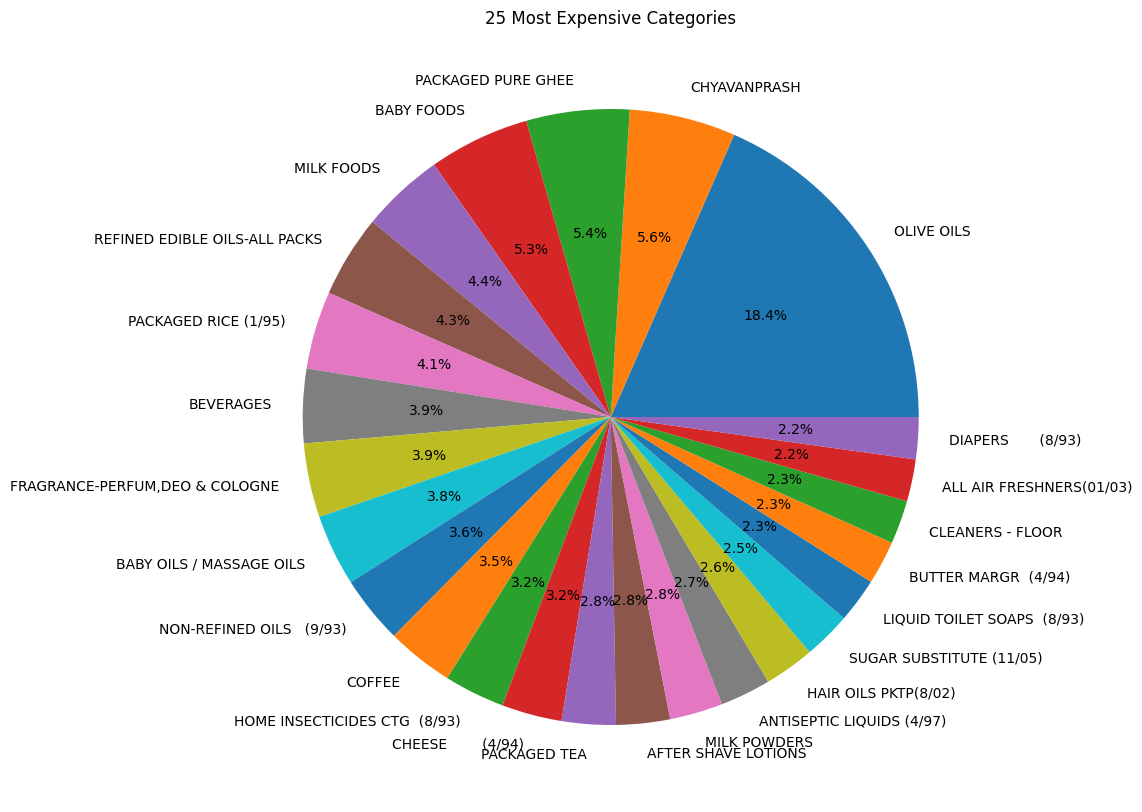

In [25]:
grp_per_price = merged_df.groupby("GRP").mean(numeric_only=True).sort_values("PRICE", ascending=False)[["PRICE","QTY_x"]][0:25]

plt.figure(figsize=(10,10))
plt.pie(grp_per_price['PRICE'], labels = grp_per_price.index, autopct='%1.1f%%')

plt.title("25 Most Expensive Categories")
plt.show()


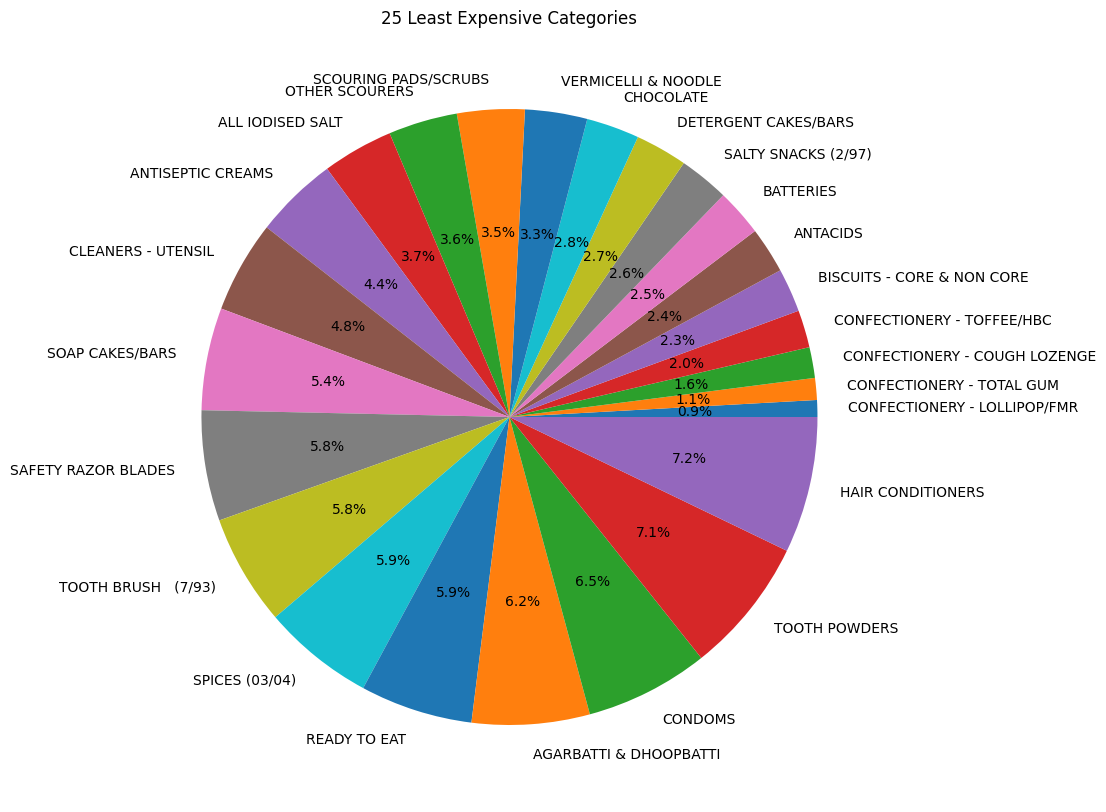

In [26]:
grp_per_price_2 = merged_df.groupby("GRP").mean(numeric_only=True).sort_values("PRICE", ascending=True)[["PRICE","QTY_x"]][0:25]

# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(grp_per_price_2['PRICE'], labels = grp_per_price_2.index, autopct='%1.1f%%')

plt.title("25 Least Expensive Categories")
plt.show()

Conclusions :

Customers at stores 1 and 5 are largely dominated with snacks (Biscuits)
Customers at stores 3, 6, and 7 are mostly dominated with pantry products (Edible oils)
Customers at store 2 are dominated with packaged tea and coffee.
The rest of the stores do not have a dominant category but instead two, three, or more of them
This may help concluding why stores 4, 6, 8, and 9 have higher average sales since their customer preferences do not rely solely on lower priced categories such as snacks (as is the case for stores 1, 2, and 5) but also in higher priced items such as cleaning products and specialty pantry products.

# Which Brands are most likely bought by customers ?

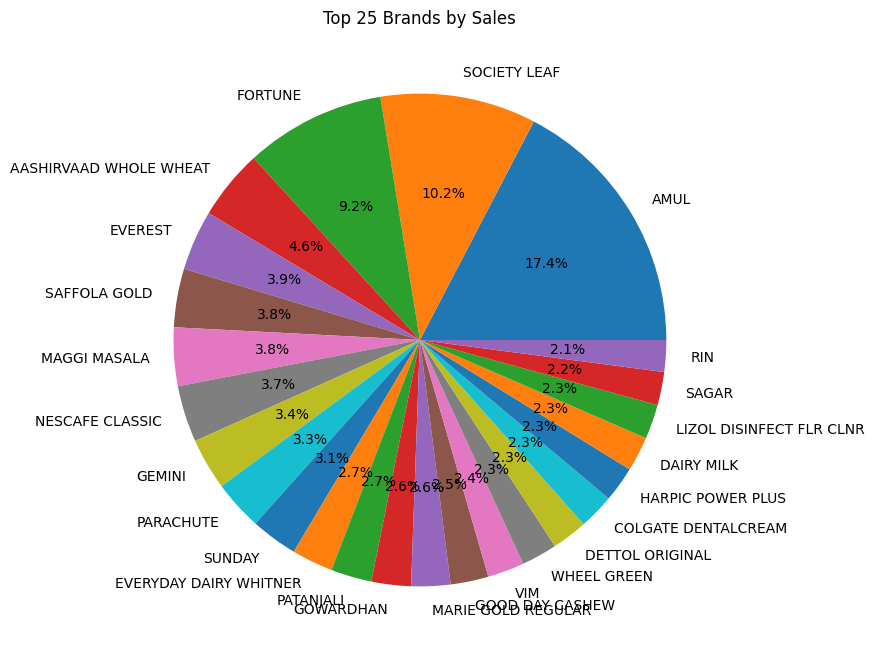

In [27]:
brands_v = merged_df.groupby('BRD').sum(numeric_only=True).sort_values('VALUE',ascending=False)[['VALUE','QTY_x']][0:25]
plt.figure(figsize=(12,8))
plt.pie(brands_v['VALUE'], labels = brands_v.index, autopct='%1.1f%%')
plt.title("Top 25 Brands by Sales")
plt.show()

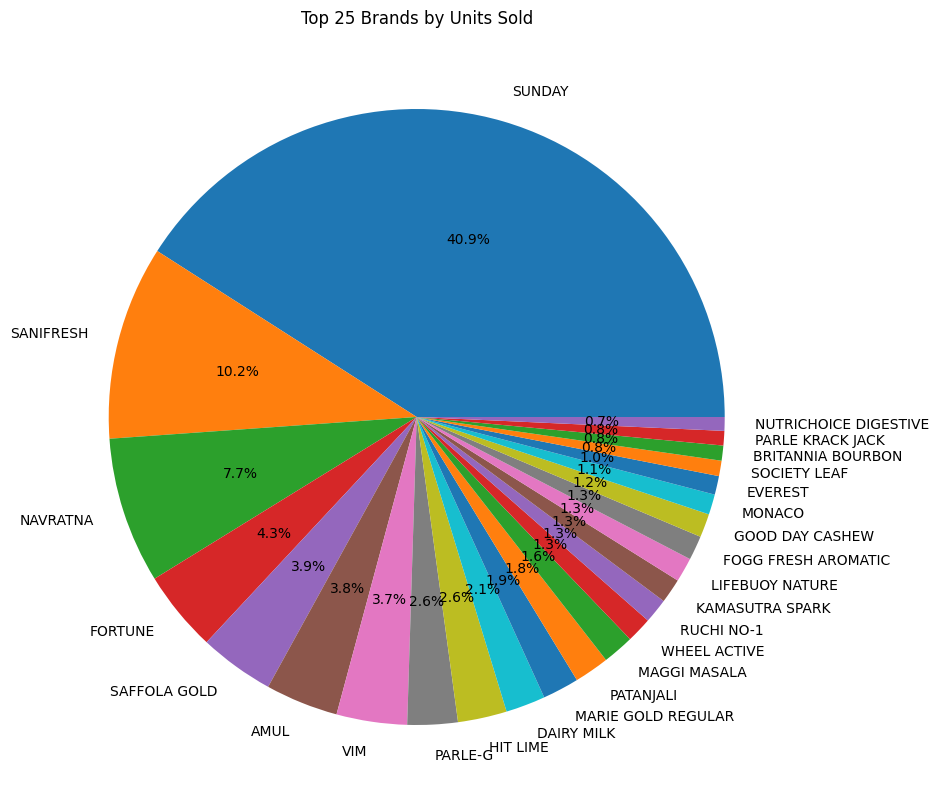

In [28]:
brands_q = merged_df.groupby('BRD').sum(numeric_only=True).sort_values('QTY_x',ascending=False)[['VALUE','QTY_x']][0:25]

plt.figure(figsize=(10,10))
plt.pie(brands_q['QTY_x'], labels = brands_q.index, autopct='%1.1f%%')
plt.title("Top 25 Brands by Units Sold")
plt.show()

From this we can conclude that Sunday and Amul is largely preferred and consumed by the customers.

# Analysis of Each Brands that are bought by the customers in each store

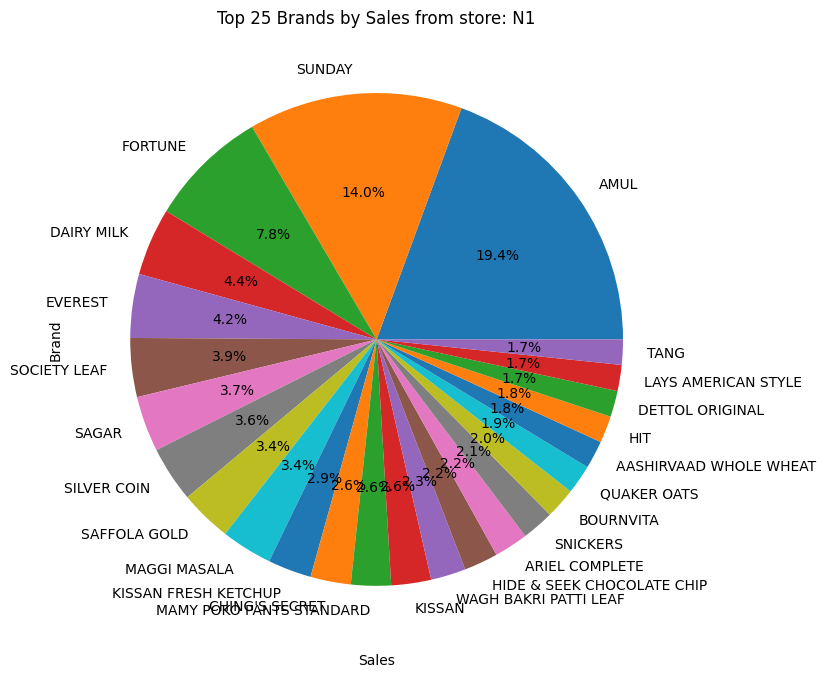

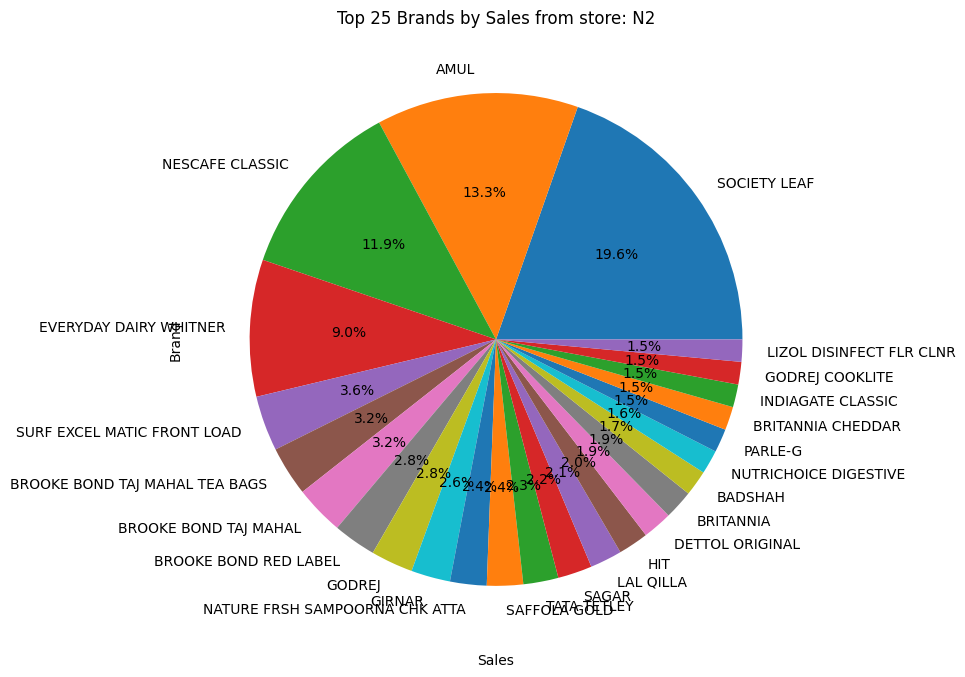

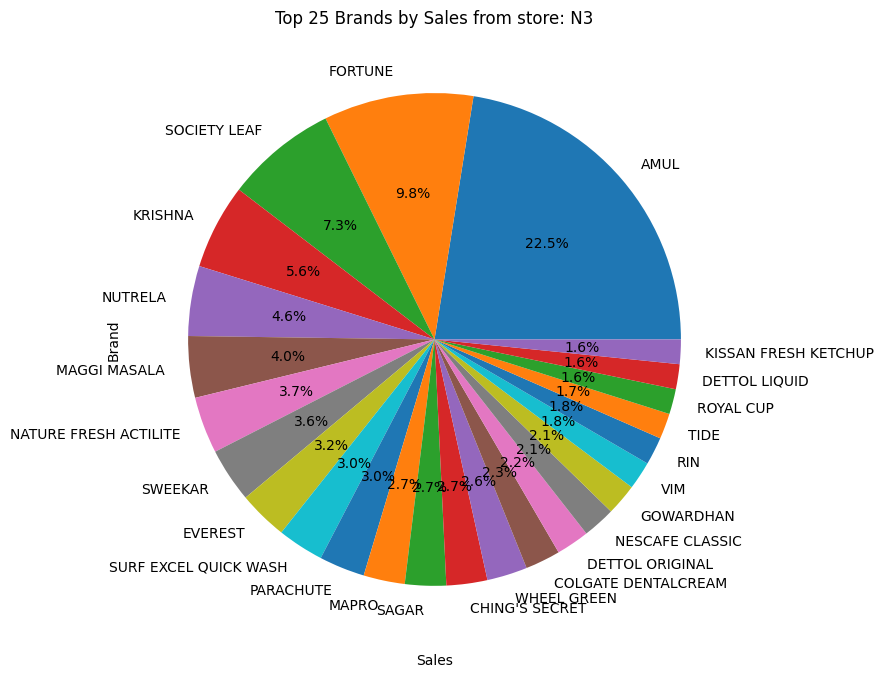

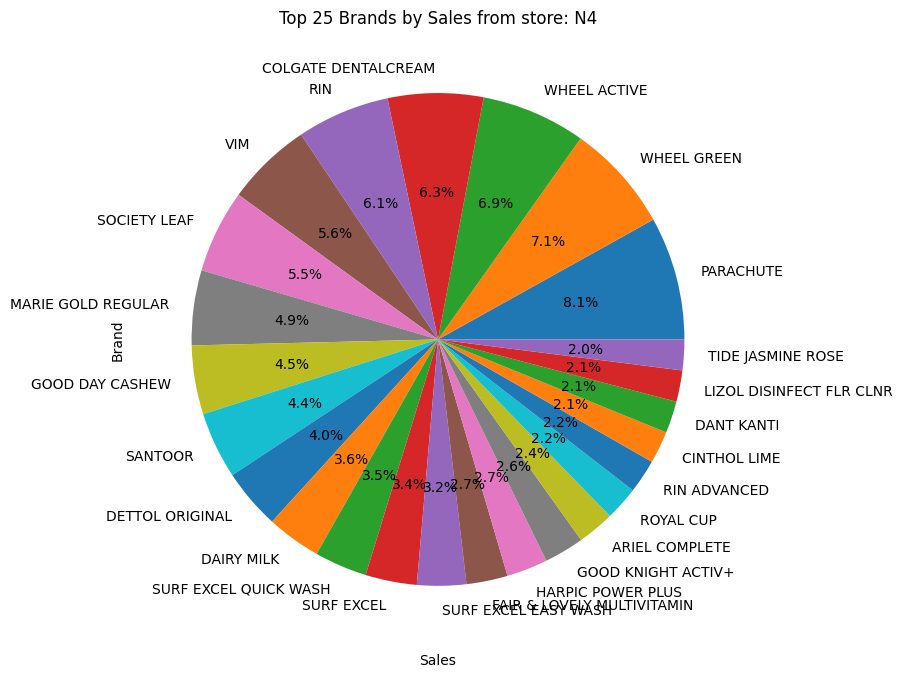

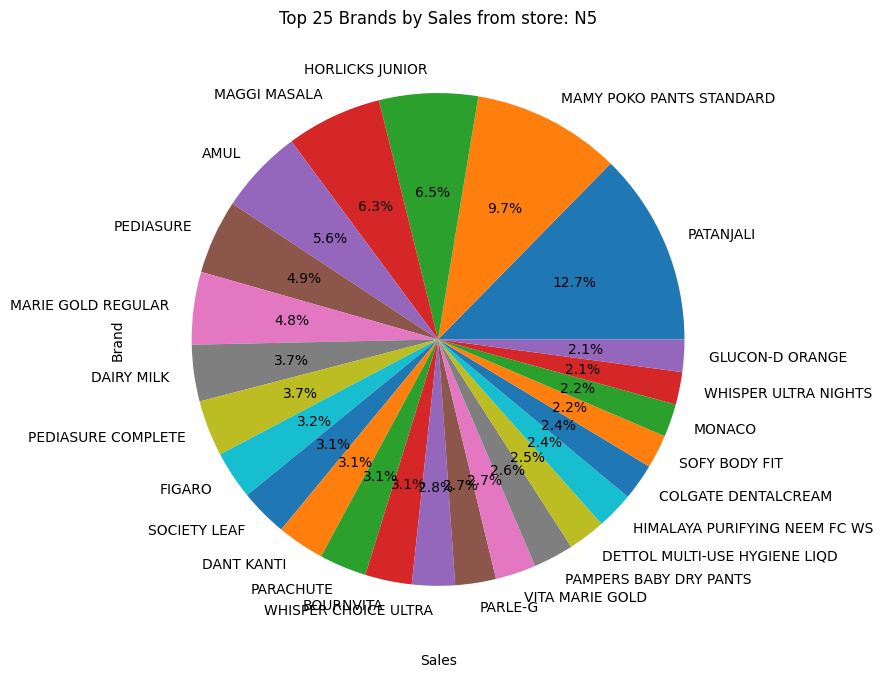

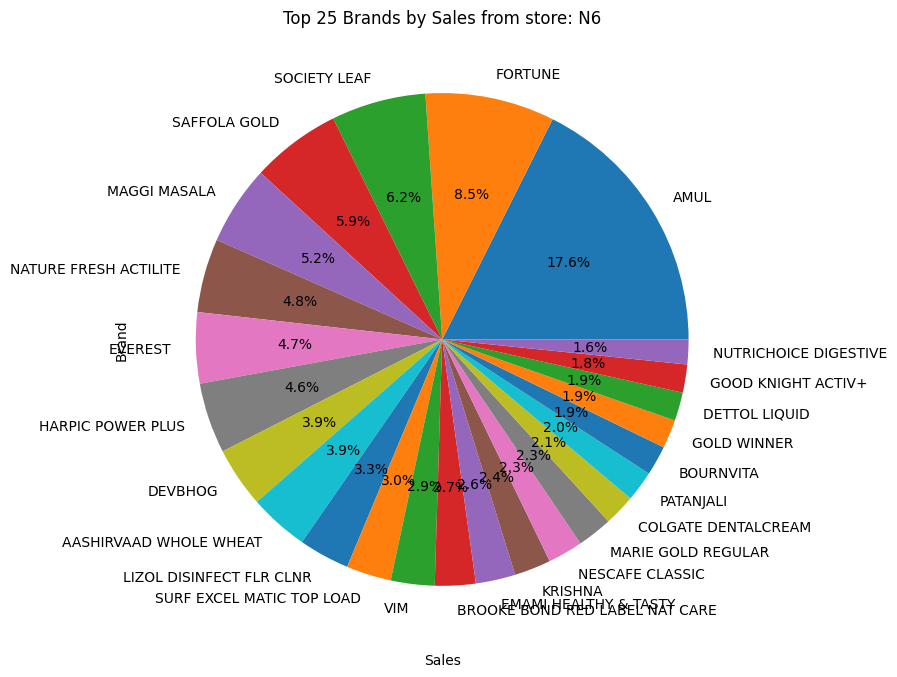

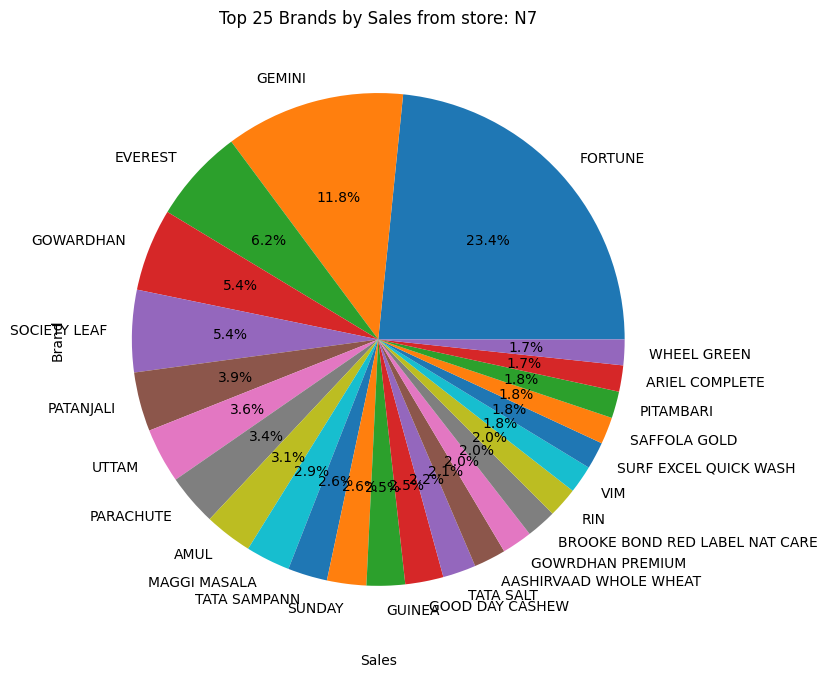

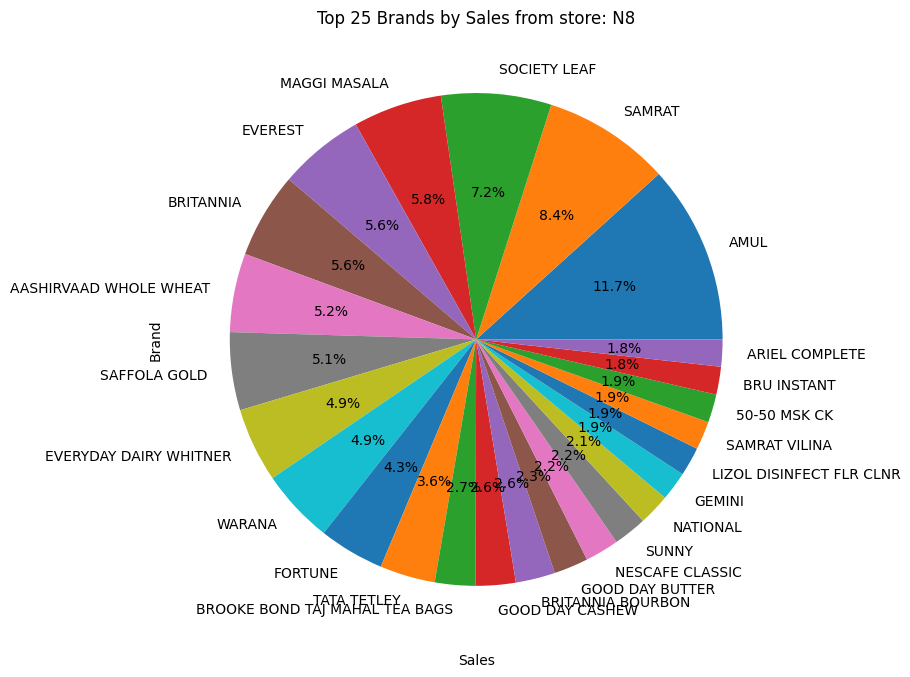

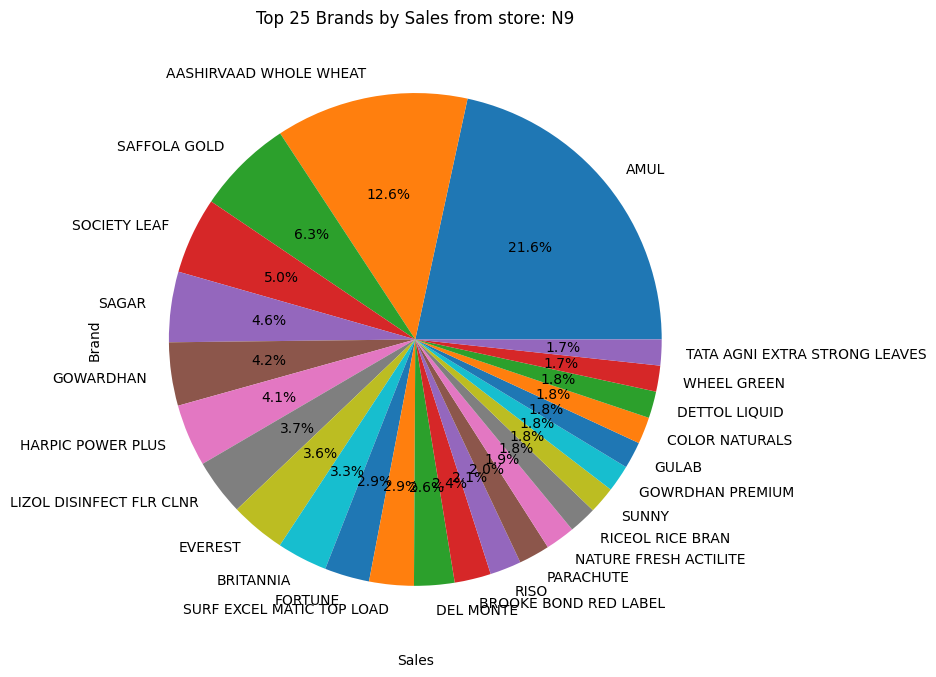

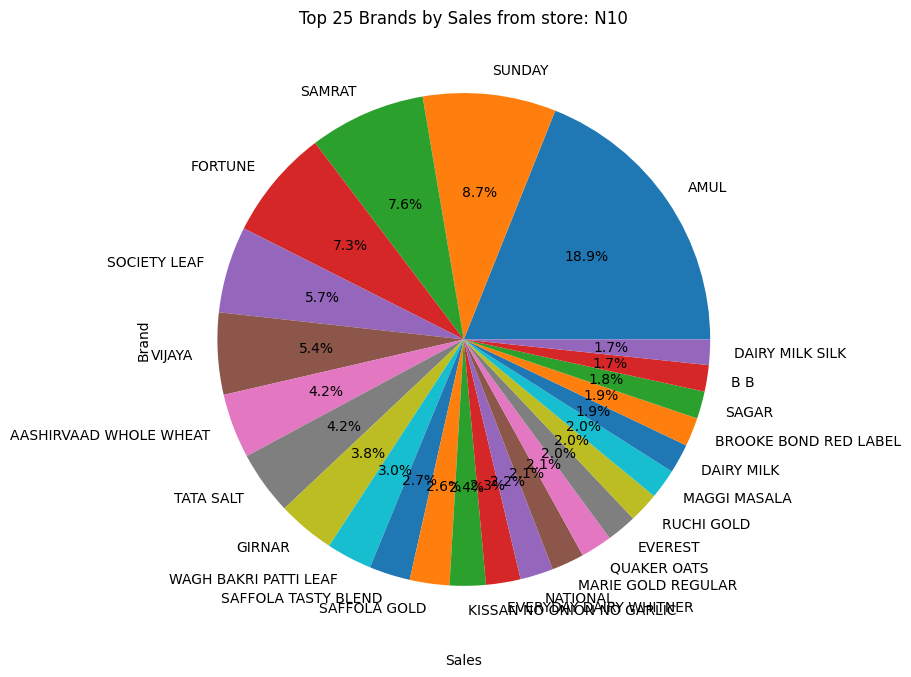

In [29]:
for i in merged_df.STORECODE.unique():
    brd_st = merged_df.loc[merged_df.STORECODE == i]
    brd = brd_st.groupby('BRD').sum(numeric_only=True).sort_values('VALUE',ascending=False)[['VALUE','QTY_x']][0:25]
    plt.figure(figsize=(12,8))
    plt.pie(brd['VALUE'], labels = brd.index, autopct='%1.1f%%')
    plt.title("Top 25 Brands by Sales from store: " + i)
    plt.xlabel("Sales")
    plt.ylabel("Brand")

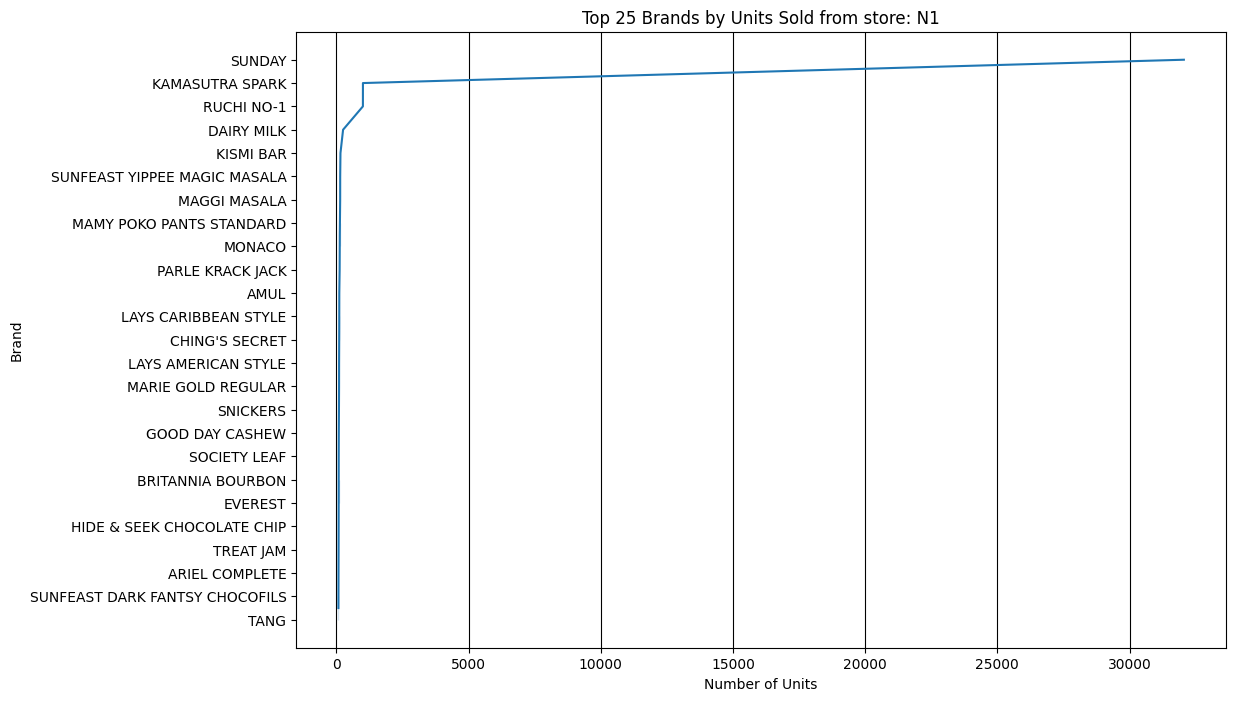

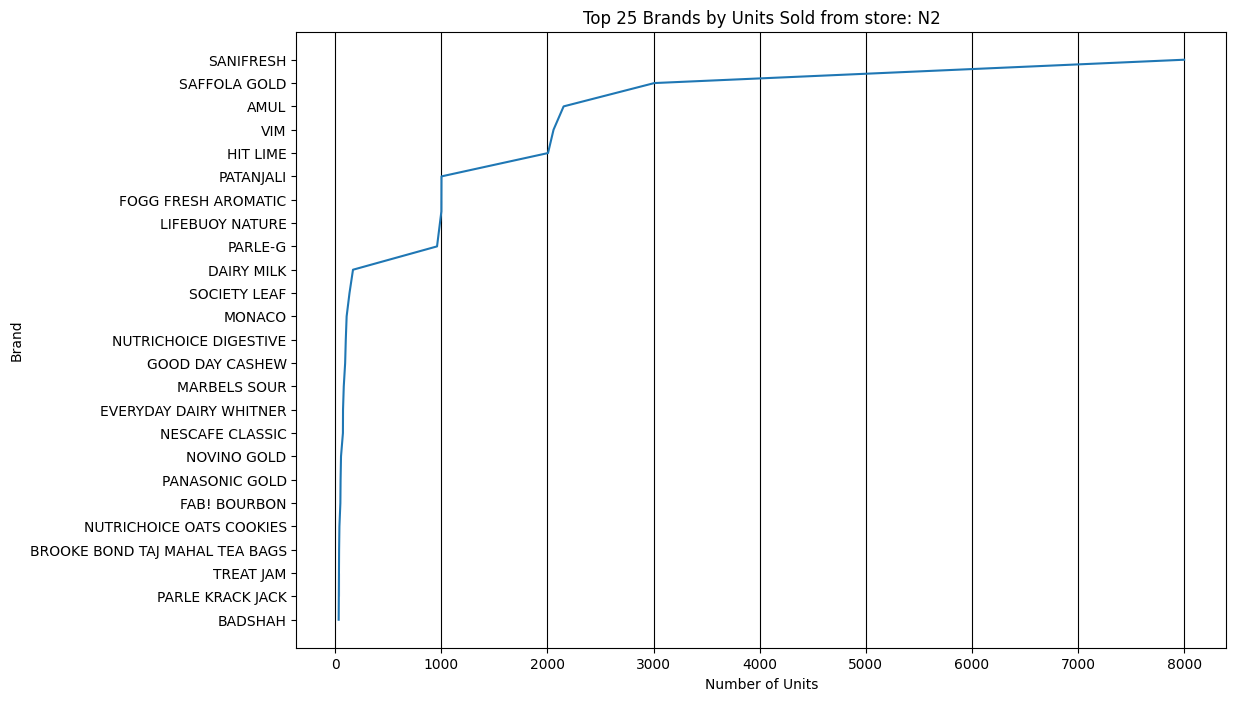

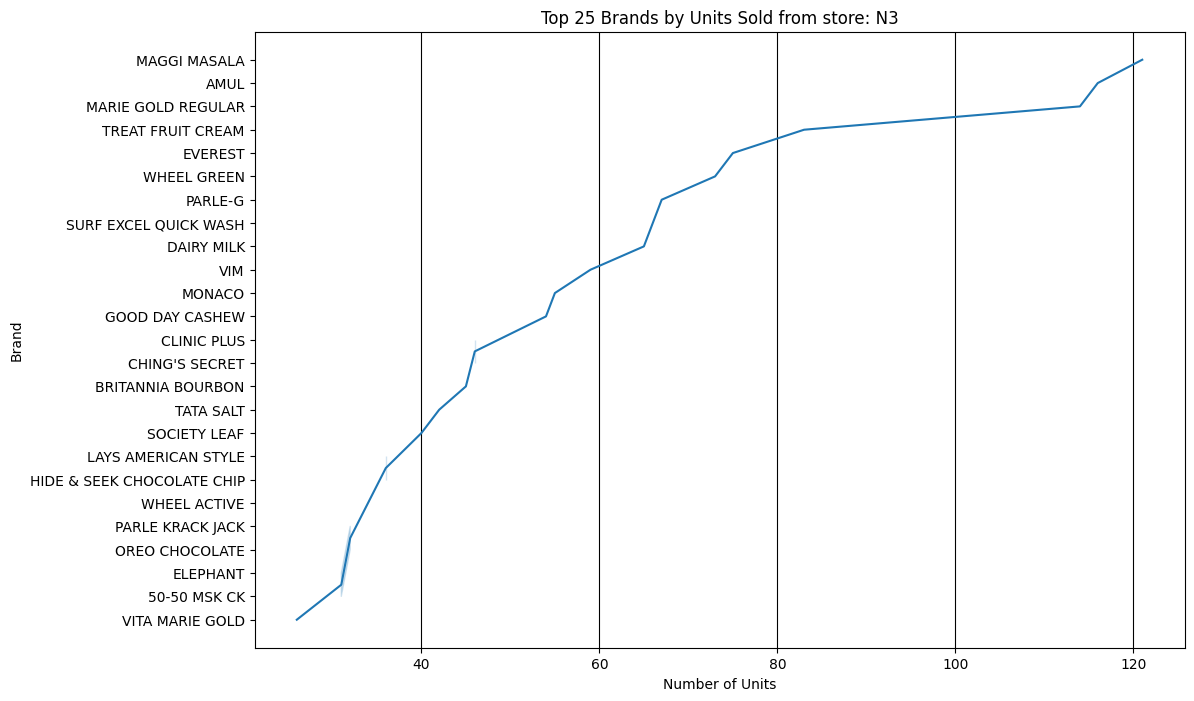

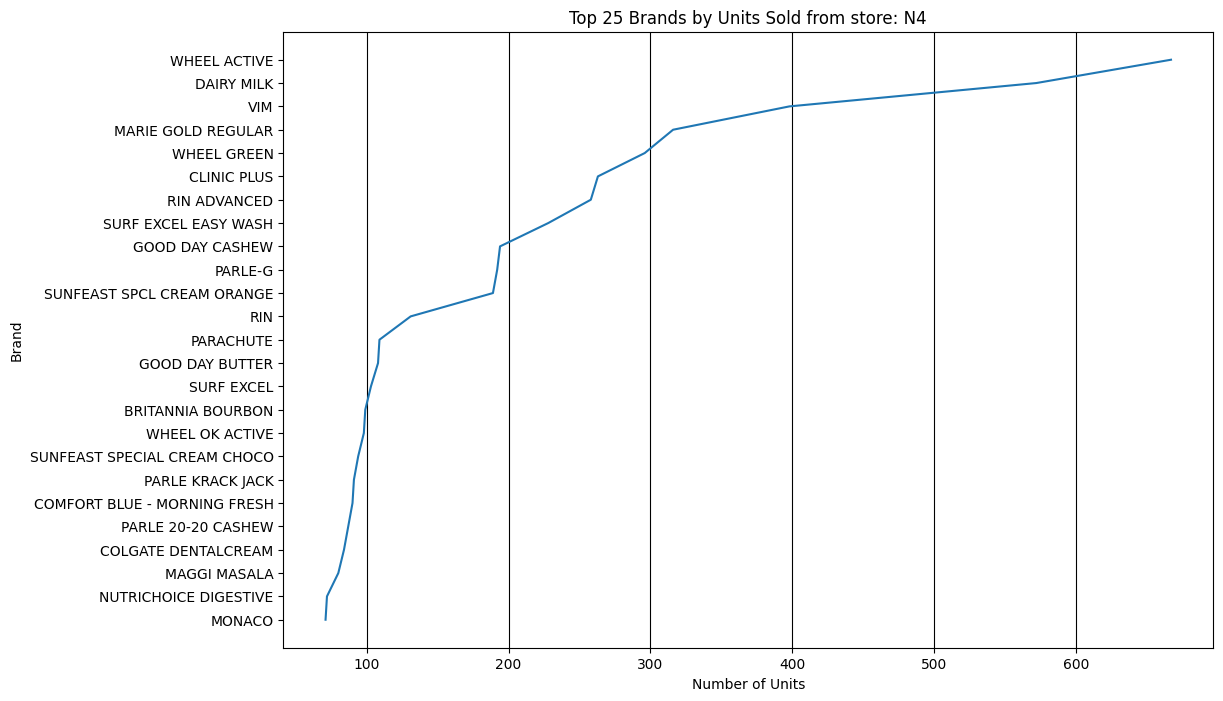

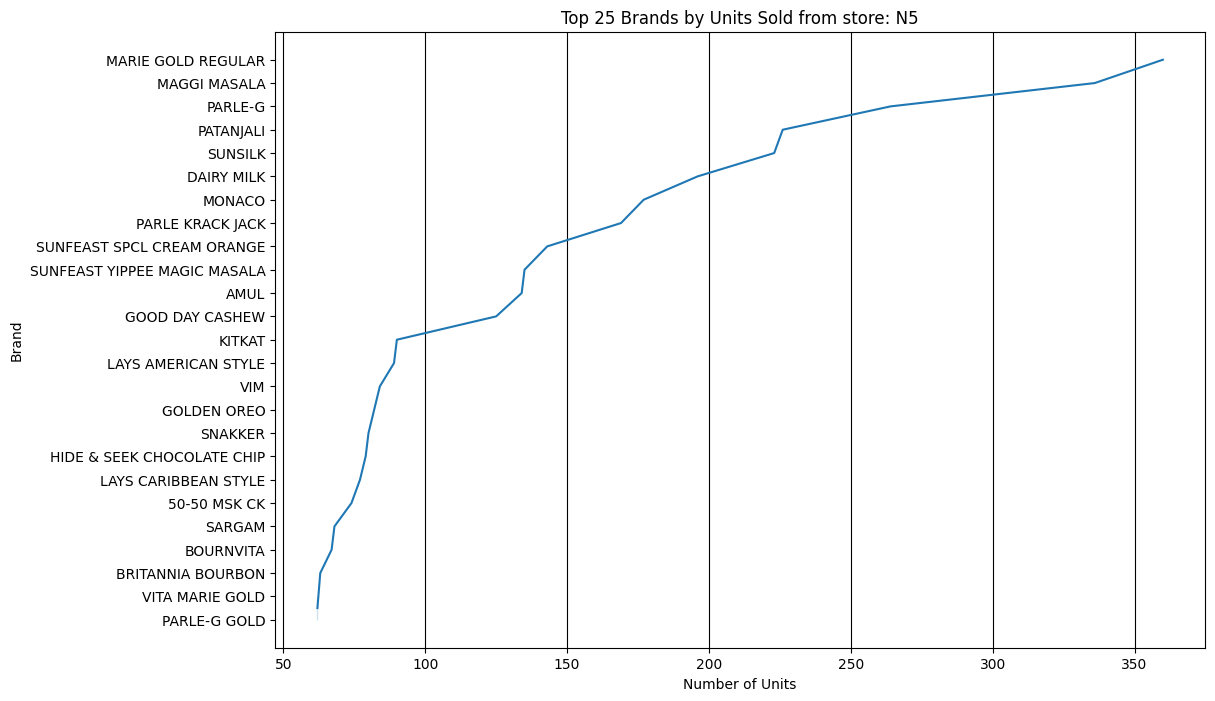

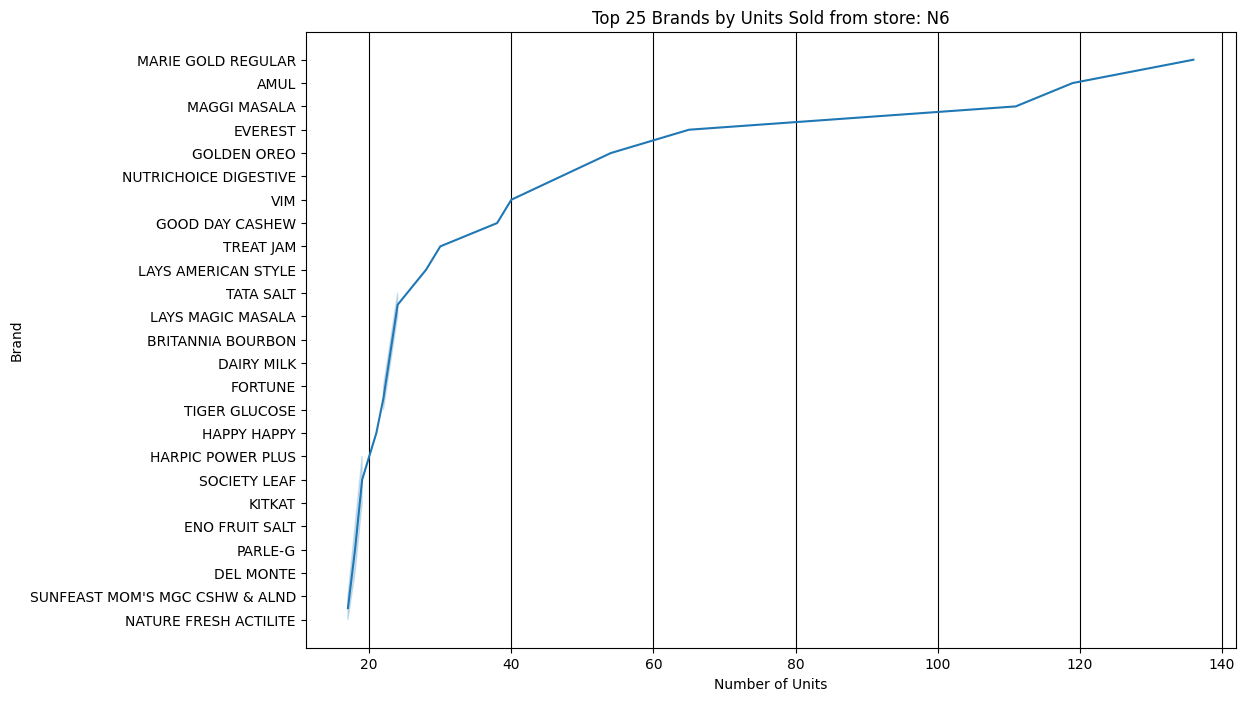

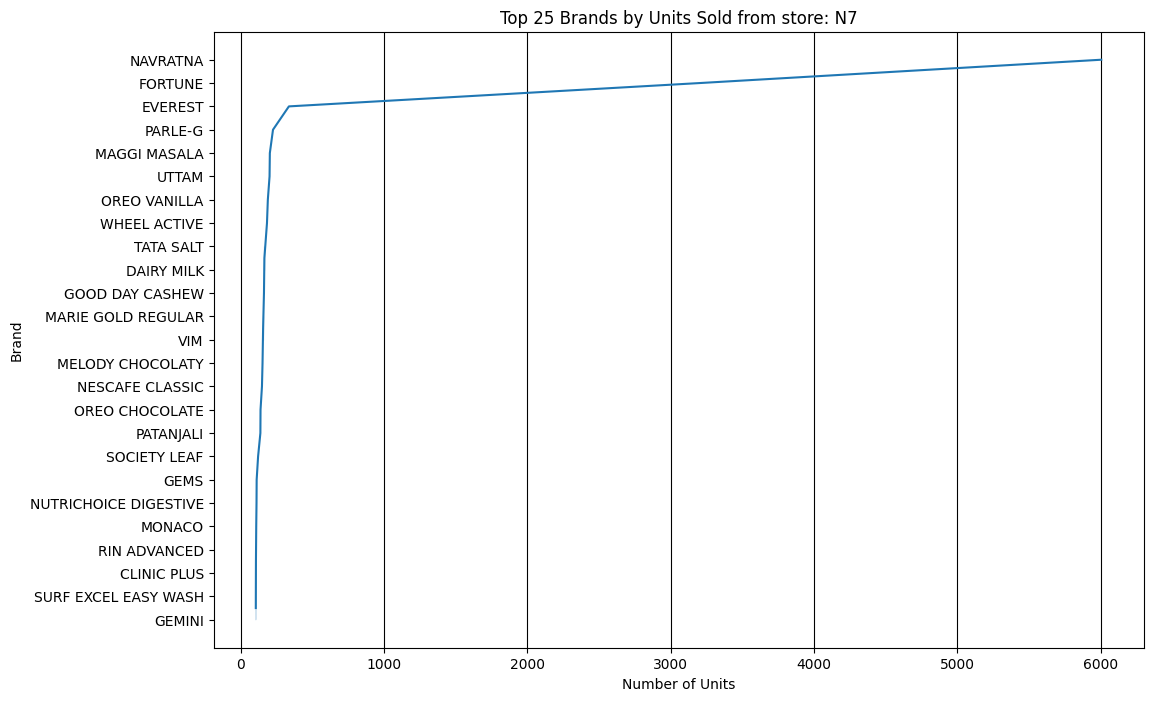

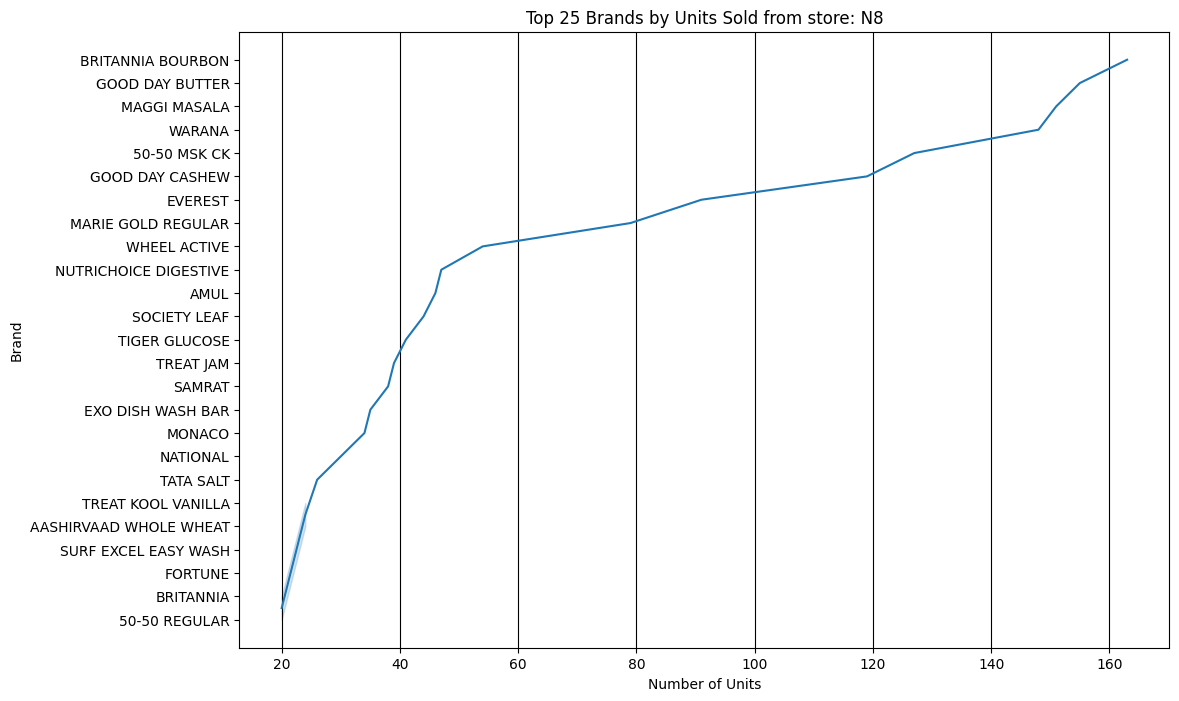

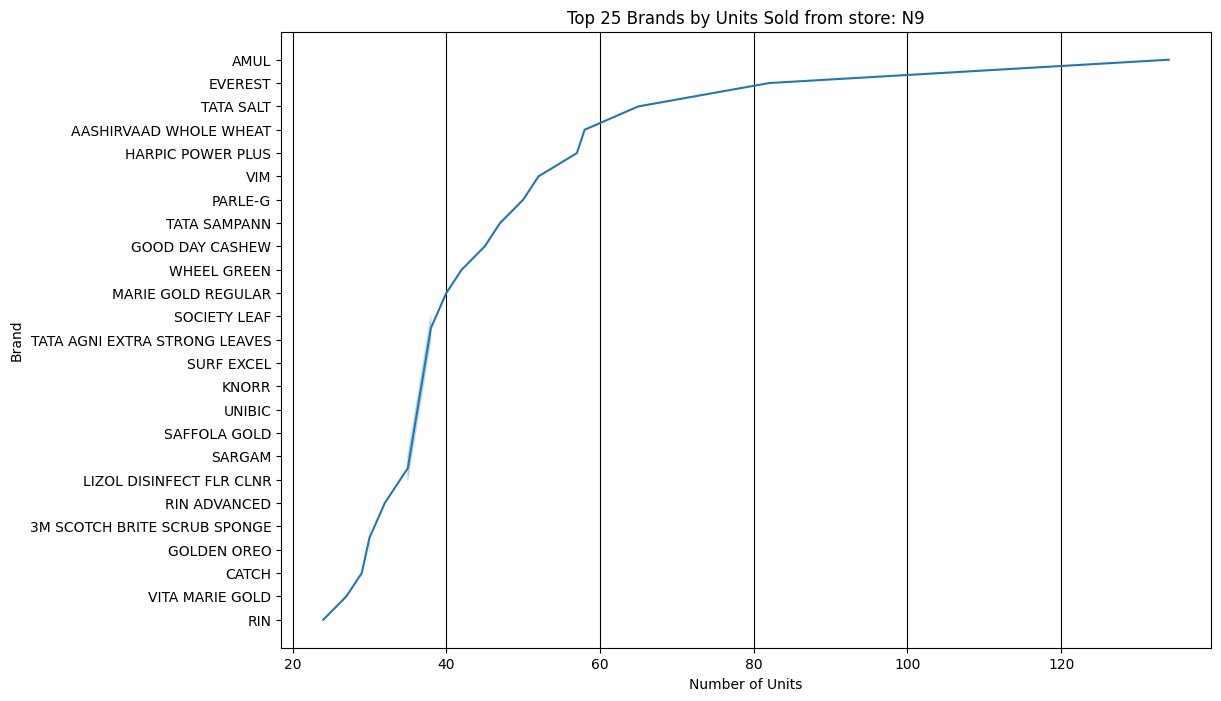

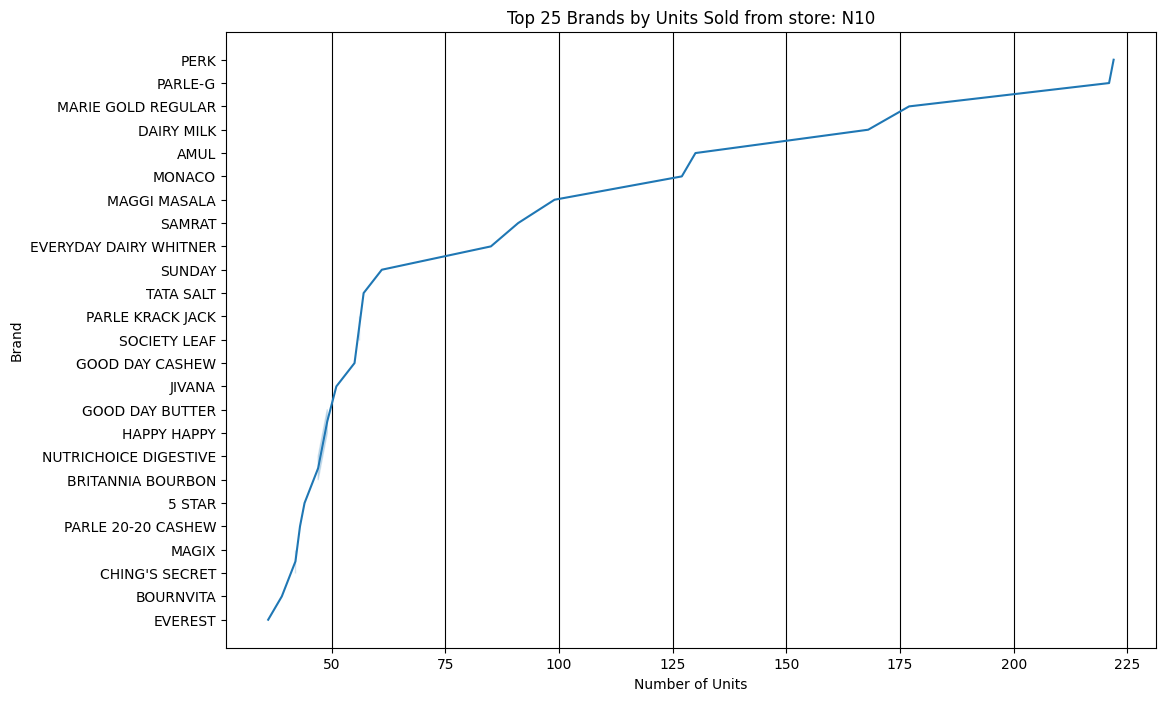

In [30]:
for i in merged_df.STORECODE.unique():
    brd_st = merged_df.loc[merged_df.STORECODE == i]
    brd = brd_st.groupby('BRD').sum(numeric_only=True).sort_values('QTY_x',ascending=False)[['VALUE','QTY_x']][0:25]
    plt.figure(figsize=(12,8))
    sns.lineplot(x='QTY_x',y=brd.index,data=brd, sort=False)
    plt.title("Top 25 Brands by Units Sold from store: " + i)
    plt.xlabel("Number of Units")
    plt.ylabel("Brand")
    plt.grid(axis='x',color='black')

# The Search for the Store that the Customers bought More Units ?

It may also be helpful to analyze the physical volume that each store handles in order to understand their size as this could be significant while designing a strategy.

In [31]:
store_qty = merged_df.groupby("UNIQUE_ID").sum(numeric_only=True)[['QTY_x','PRICE']]
store_qty['STORE'] = store_qty.index.str.split('_').str[0]
store_qty

QTY_x  PRICE STORE
UNIQUE_ID                    
N10_T1038    1.0   34.0   N10
N10_T1039    1.0   46.0   N10
N10_T1040    1.0   86.0   N10
N10_T1043    1.0   20.0   N10
N10_T1048    2.0  180.0   N10
...          ...    ...   ...
N9_T940      1.0  200.0    N9
N9_T95       1.0   56.0    N9
N9_T953     28.0  885.0    N9
N9_T96       2.0   80.0    N9
N9_T99       1.0  170.0    N9

[13491 rows x 3 columns]

from matplotlib import pyplot as plt
store_qty['QTY_x'].plot(kind='hist', bins=20, title='QTY_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
store_qty['PRICE'].plot(kind='hist', bins=20, title='PRICE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
store_qty.plot(kind='scatter', x='QTY_x', y='PRICE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
store_qty['QTY_x'].plot(kind='line', figsize=(8, 4), title='QTY_x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
store_qty['PRICE'].plot(kind='line', figsize=(8, 4), title='PRICE')
plt.gca().spines[['top', 'right']].set_visible(False)

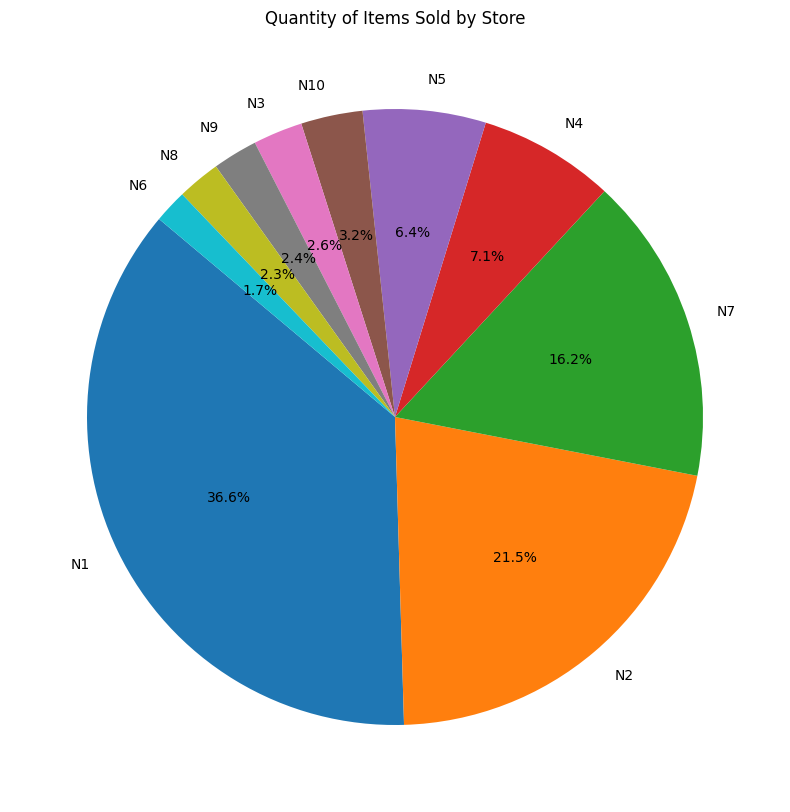

In [32]:
units_by_store = store_qty.groupby("STORE").sum(numeric_only=True).sort_values('QTY_x', ascending=False)

plt.figure(figsize=(20, 10))
plt.pie(units_by_store["QTY_x"], labels=units_by_store.index, autopct='%1.1f%%', startangle=140)
plt.title("Quantity of Items Sold by Store")
plt.show()

The above graph explains that store 1 handles five times more customers than most stores.
However, store 1's sales by unit is relies largely in the sales of biscuits. Therefore, despite handling a seemingly large volume, store 1 may not necessarily be the bigger one.

The second biggest store by units sold is store 2 whose total sales are dominated by packaged tea and coffee. However, their sales by unit mostly rely on pantry products and cleaning products. we can then deduce than it is very likely that store number 2 is indeed a physically larger store.

In terms of store 7 (third largest by volume), most of its sales rely in pantry products and personal care products. This store is also the one with the highest sales during the three months analyzed.

Stores 4 and 5 have very diversified sales.

In [33]:
str_brd = df.groupby("STORECODE")["BRD"].nunique().sort_values(ascending=False)
str_brd

STORECODE
N5     572
N7     496
N1     447
N4     357
N9     347
N3     326
N2     313
N6     284
N10    272
N8     261
Name: BRD, dtype: int64

# Density of Customers by each Month

In [34]:
month_info = merged_df[["MONTH","UNIQUE_ID"]]
month_info

MONTH  UNIQUE_ID
0        M1    N1_T375
1        M1    N1_T379
2        M1    N1_T381
3        M1    N1_T382
4        M1    N1_T384
...     ...        ...
26980    M3  N10_T5999
26981    M3  N10_T6007
26982    M3  N10_T6007
26983    M3  N10_T6007
26984    M3  N10_T6013

[26985 rows x 2 columns]

from matplotlib import pyplot as plt
import seaborn as sns
month_info.groupby('MONTH').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
monthly_sales = pd.merge(month_info,unique_sales,on="UNIQUE_ID")
monthly_sales

MONTH  UNIQUE_ID  DAY_y  BILL_AMT_y STORE
0        M1    N1_T375    4.0       225.0    N1
1        M1    N1_T379    4.0        95.0    N1
2        M1    N1_T381    4.0        10.0    N1
3        M1    N1_T382    4.0       108.0    N1
4        M1    N1_T384    4.0        19.0    N1
...     ...        ...    ...         ...   ...
26980    M3  N10_T5999   31.0        10.0   N10
26981    M3  N10_T6007   31.0        88.0   N10
26982    M3  N10_T6007   31.0        88.0   N10
26983    M3  N10_T6007   31.0        88.0   N10
26984    M3  N10_T6013   31.0        15.0   N10

[26985 rows x 5 columns]

from matplotlib import pyplot as plt
monthly_sales['DAY_y'].plot(kind='hist', bins=20, title='DAY_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['BILL_AMT_y'].plot(kind='hist', bins=20, title='BILL_AMT_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
monthly_sales.groupby('MONTH').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales.plot(kind='scatter', x='DAY_y', y='BILL_AMT_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['DAY_y'].plot(kind='line', figsize=(8, 4), title='DAY_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['BILL_AMT_y'].plot(kind='line', figsize=(8, 4), title='BILL_AMT_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(monthly_sales['MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(monthly_sales, x='DAY_y', y='MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(monthly_sales['MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(monthly_sales, x='BILL_AMT_y', y='MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:
monthly_sales['N_MONTH'] = monthly_sales['MONTH'].apply(lambda x: x[1])
monthly_sales

MONTH  UNIQUE_ID  DAY_y  BILL_AMT_y STORE N_MONTH
0        M1    N1_T375    4.0       225.0    N1       1
1        M1    N1_T379    4.0        95.0    N1       1
2        M1    N1_T381    4.0        10.0    N1       1
3        M1    N1_T382    4.0       108.0    N1       1
4        M1    N1_T384    4.0        19.0    N1       1
...     ...        ...    ...         ...   ...     ...
26980    M3  N10_T5999   31.0        10.0   N10       3
26981    M3  N10_T6007   31.0        88.0   N10       3
26982    M3  N10_T6007   31.0        88.0   N10       3
26983    M3  N10_T6007   31.0        88.0   N10       3
26984    M3  N10_T6013   31.0        15.0   N10       3

[26985 rows x 6 columns]

from matplotlib import pyplot as plt
monthly_sales['DAY_y'].plot(kind='hist', bins=20, title='DAY_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['BILL_AMT_y'].plot(kind='hist', bins=20, title='BILL_AMT_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
monthly_sales.groupby('MONTH').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
monthly_sales.groupby('N_MONTH').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales.plot(kind='scatter', x='DAY_y', y='BILL_AMT_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['DAY_y'].plot(kind='line', figsize=(8, 4), title='DAY_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['BILL_AMT_y'].plot(kind='line', figsize=(8, 4), title='BILL_AMT_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['N_MONTH'].value_counts()
    for x_label, grp in monthly_sales.groupby('MONTH')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MONTH')
_ = plt.ylabel('N_MONTH')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(monthly_sales['MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(monthly_sales, x='DAY_y', y='MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(monthly_sales['N_MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(monthly_sales, x='DAY_y', y='N_MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(monthly_sales['MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(monthly_sales, x='BILL_AMT_y', y='MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(monthly_sales['N_MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(monthly_sales, x='BILL_AMT_y', y='N_MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [37]:
monthly_sales = monthly_sales.drop('MONTH',axis=1)
monthly_sales

UNIQUE_ID  DAY_y  BILL_AMT_y STORE N_MONTH
0        N1_T375    4.0       225.0    N1       1
1        N1_T379    4.0        95.0    N1       1
2        N1_T381    4.0        10.0    N1       1
3        N1_T382    4.0       108.0    N1       1
4        N1_T384    4.0        19.0    N1       1
...          ...    ...         ...   ...     ...
26980  N10_T5999   31.0        10.0   N10       3
26981  N10_T6007   31.0        88.0   N10       3
26982  N10_T6007   31.0        88.0   N10       3
26983  N10_T6007   31.0        88.0   N10       3
26984  N10_T6013   31.0        15.0   N10       3

[26985 rows x 5 columns]

from matplotlib import pyplot as plt
monthly_sales['DAY_y'].plot(kind='hist', bins=20, title='DAY_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['BILL_AMT_y'].plot(kind='hist', bins=20, title='BILL_AMT_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
monthly_sales.groupby('N_MONTH').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales.plot(kind='scatter', x='DAY_y', y='BILL_AMT_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['DAY_y'].plot(kind='line', figsize=(8, 4), title='DAY_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
monthly_sales['BILL_AMT_y'].plot(kind='line', figsize=(8, 4), title='BILL_AMT_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(monthly_sales['N_MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(monthly_sales, x='DAY_y', y='N_MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(monthly_sales['N_MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(monthly_sales, x='BILL_AMT_y', y='N_MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [38]:
monthly_sales['N_MONTH'] = pd.to_numeric(monthly_sales['N_MONTH'])

In [39]:
month_uq = monthly_sales.groupby('UNIQUE_ID').mean(numeric_only=True)
month_uq

DAY_y  BILL_AMT_y  N_MONTH
UNIQUE_ID                            
N10_T1038    5.0        34.0      1.0
N10_T1039    5.0        46.0      1.0
N10_T1040    5.0        86.0      1.0
N10_T1043    5.0        20.0      1.0
N10_T1048    5.0       180.0      1.0
...          ...         ...      ...
N9_T940      2.0       200.0      3.0
N9_T95       7.0        56.0      1.0
N9_T953      3.0      1656.0      3.0
N9_T96       7.0       160.0      1.0
N9_T99       7.0       170.0      1.0

[13491 rows x 3 columns]

from matplotlib import pyplot as plt
month_uq['DAY_y'].plot(kind='hist', bins=20, title='DAY_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_uq['BILL_AMT_y'].plot(kind='hist', bins=20, title='BILL_AMT_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_uq['N_MONTH'].plot(kind='hist', bins=20, title='N_MONTH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_uq.plot(kind='scatter', x='DAY_y', y='BILL_AMT_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_uq.plot(kind='scatter', x='BILL_AMT_y', y='N_MONTH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_uq['DAY_y'].plot(kind='line', figsize=(8, 4), title='DAY_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
month_uq['BILL_AMT_y'].plot(kind='line', figsize=(8, 4), title='BILL_AMT_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
month_uq['N_MONTH'].plot(kind='line', figsize=(8, 4), title='N_MONTH')
plt.gca().spines[['top', 'right']].set_visible(False)

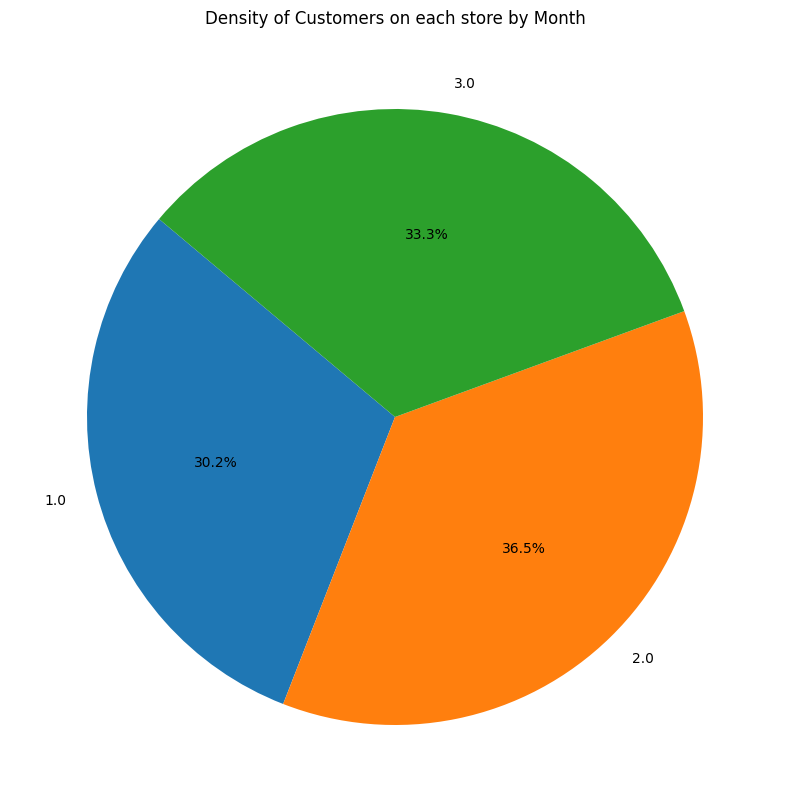

In [40]:
m_sales = month_uq.groupby('N_MONTH').sum()

plt.figure(figsize=(10, 10))
plt.pie(m_sales['BILL_AMT_y'], labels=m_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Density of Customers on each store by Month")
plt.show()


The above graph concludes that the store 2 is larely addressed by the customers than store 1 (which is the second) and store 3 (which is the least).